##### list of experiment:
- EXP1: std algorithm, node doubled, partition generated
- EXP2: std algorithm, node doubled, partition fixed to 10 community
- EXP3: std algorithm, partition doubled, graph fixed to 2expnode(n=20480, m=50000).graph
- EXP4: std algorithm, edge doubled, partition generated
- EXP5 undirected algorithm, node doubled, partition fixed to 10 community
- EXP6 undirected algorithm, partition doubled, graph fixed to 2expnode(n=20480, m=50000).graph
- EXP7 undirected algorithm, edge doubled, partition generated

In [199]:
import networkit as nk
import numpy as np
import pandas as pd
import re
from networkit.graphio import BinaryPartitionReader
import matplotlib.pyplot as plt

In [200]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data

,Code,Graph,Partition,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.249632,0.810747,19.468141,19.469360
1,python,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.457549,2.529974,66.076160,66.081450
2,python,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.020755,0.051101,1.059860,1.060017
3,python,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.757963,20.458904,593.701867,593.732502
4,python,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.021359,0.394145,7.887121,7.887537
...,...,...,...,...,...,...,...,...
263,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.003854,0.010564,0.010720,0.010732
264,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.022016,0.027625,0.027863,0.027880
265,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.004865,0.009217,0.009503,0.009520
266,C++,"2expedge(n=640, m=10224).graph",NaN,2expedgeundirected,0.005169,0.008841,0.009220,0.009238


In [201]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(2)))

In [202]:
all_data["deltaNodesComputation"] = all_data["Nodes computation"] - all_data["Community computation"]
all_data["deltaGLR"] = all_data["GLR computation"] - all_data["Nodes computation"]

In [203]:
grouped = all_data.groupby(['Code', 'Graph', 'Flag', 'Partition', 'n', 'm'], as_index=False, dropna=False)
all_data = grouped.mean()
all_data

,Code,Graph,Flag,Partition,n,m,Community computation,Nodes computation,GLR computation,Total,deltaNodesComputation,deltaGLR
0,C++,"2expedge(n=640, m=10224).graph",2expedge,NaN,640,10224,0.436834,0.453034,1.118107,1.118243,0.016200,0.665073
1,C++,"2expedge(n=640, m=10224).graph",2expedgeundirected,NaN,640,10224,0.008763,0.019064,0.019386,0.019403,0.010301,0.000322
2,C++,"2expedge(n=640, m=1278).graph",2expedge,NaN,640,1278,0.006216,0.022540,0.237181,0.237335,0.016324,0.214641
3,C++,"2expedge(n=640, m=1278).graph",2expedgeundirected,NaN,640,1278,0.008454,0.014243,0.014501,0.014522,0.005789,0.000258
4,C++,"2expedge(n=640, m=163584).graph",2expedge,NaN,640,163584,0.040110,0.086369,5.495393,5.495569,0.046259,5.409024
...,...,...,...,...,...,...,...,...,...,...,...,...
101,python,"2expnode(n=5120, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,5120,50000,0.056638,0.656639,16.195146,16.195926,0.600000,15.538508
102,python,"2expnode(n=5120, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,5120,50000,0.101606,2.201550,2.300187,2.337225,2.099945,0.098637
103,python,"2expnode(n=640, m=50000).graph",2expnode,NaN,640,50000,0.020755,0.051101,1.059860,1.060017,0.030346,1.008759
104,python,"2expnode(n=640, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,640,50000,0.013811,0.076439,1.056673,1.056838,0.062629,0.980234


# Statistics

In [204]:
statistics = grouped.describe()

# Select programming language to show results for

In [205]:
programming_language = "C++" # python/C++

# Utility function

In [206]:
def plot_column(df, column_names, num_row=1, num_colum=1, one_ax=False, figsize=(20,8)):
    if one_ax:
        _, axes = plt.subplots(1, 1, figsize=figsize)
    else:
        _, axes = plt.subplots(num_row, num_colum, figsize=figsize)
    for i in range(len(column_names)):
        ax=axes 
        column_name = column_names[i]
        if (num_row, num_colum) != (1,1) and not one_ax:
           ax = axes[i] 
        if not one_ax:
            ax.set_ylabel(column_name)
        df[column_name].plot(marker="o", ax=ax, label=column_name)
    if one_ax:
         axes.legend()
    plt.show()

# Programming Language Comparison (EXP1)

##### Filter results

In [207]:
all_comparison = all_data[ all_data["Flag"] == "2expnode"]

In [208]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnode,NaN,10240,0.457549,2.529974,66.076160,66.081450,2.072425,63.546186,0.172034,0.634378,92.471686,92.473924,0.462344,91.837308
1,"2expnode(n=1280, m=50000).graph",2expnode,NaN,1280,0.054334,0.224641,1.643777,1.644040,0.170307,1.419136,0.035937,0.094207,1.564179,1.564362,0.058270,1.469972
2,"2expnode(n=20480, m=50000).graph",2expnode,NaN,20480,0.588773,7.666712,180.451038,180.457450,7.077939,172.784326,0.265604,1.385899,349.597689,349.602380,1.120295,348.211790
3,"2expnode(n=2560, m=50000).graph",2expnode,NaN,2560,0.021359,0.394145,7.887121,7.887537,0.372787,7.492976,0.057544,0.142087,9.485665,9.486185,0.084543,9.343578
4,"2expnode(n=40960, m=50000).graph",2expnode,NaN,40960,0.757963,20.458904,593.701867,593.732502,19.700940,573.242964,0.386909,4.343140,648.247755,648.258891,3.956231,643.904615
5,"2expnode(n=5120, m=50000).graph",2expnode,NaN,5120,0.249632,0.810747,19.468141,19.469360,0.561116,18.657394,0.090647,0.366563,28.803762,28.804764,0.275916,28.437199
6,"2expnode(n=640, m=50000).graph",2expnode,NaN,640,0.020755,0.051101,1.059860,1.060017,0.030346,1.008759,0.011232,0.046830,1.276260,1.276348,0.035598,1.229430


##### Set number of nodes as ID

In [209]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [210]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.060017,1.276348
1280,1.644040,1.564362
2560,7.887537,9.486185
5120,19.469360,28.804764
10240,66.081450,92.473924
20480,180.457450,349.602380
40960,593.732502,648.258891


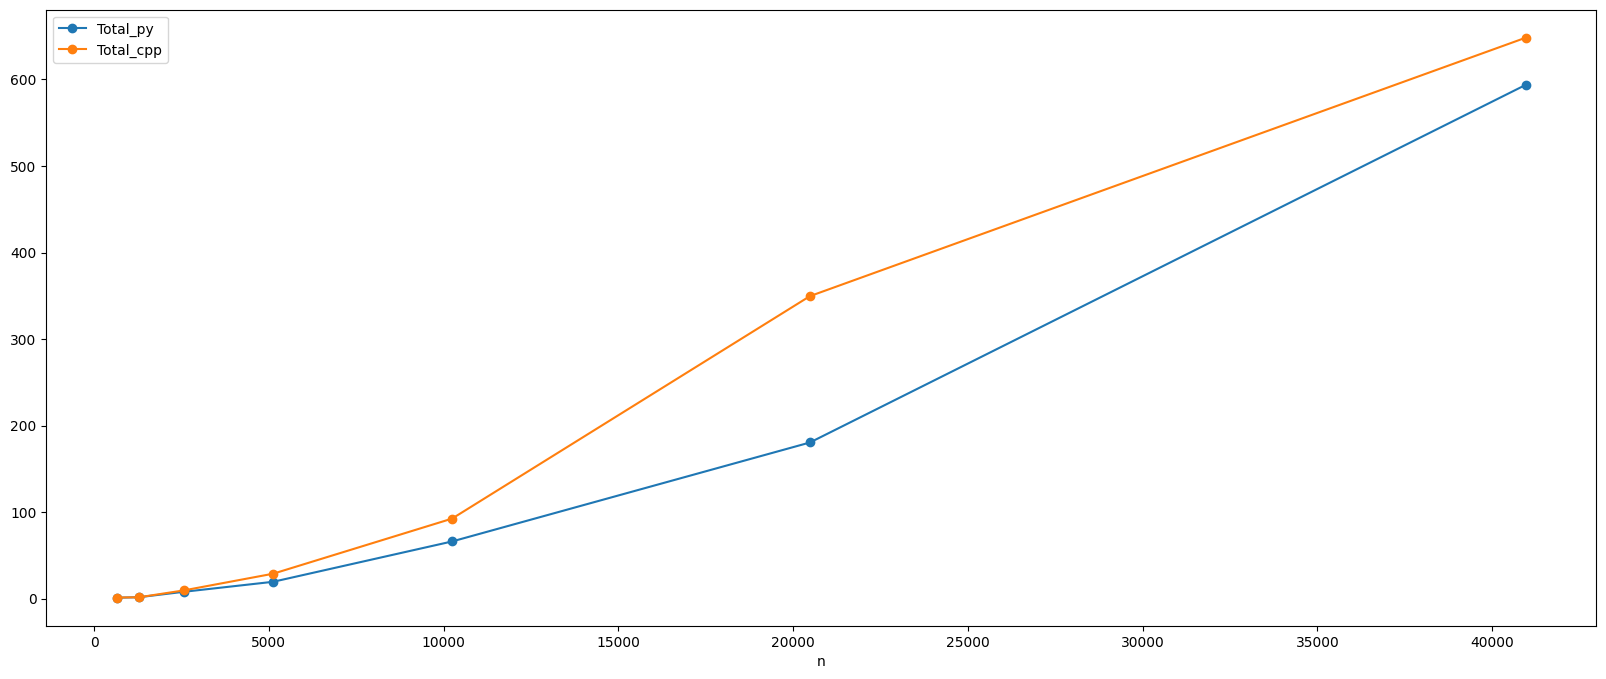

In [211]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare partitionsComputation

In [212]:
comparison.filter(regex="Community computation")

,Community computation_py,Community computation_cpp
n,,
640,0.020755,0.011232
1280,0.054334,0.035937
2560,0.021359,0.057544
5120,0.249632,0.090647
10240,0.457549,0.172034
20480,0.588773,0.265604
40960,0.757963,0.386909


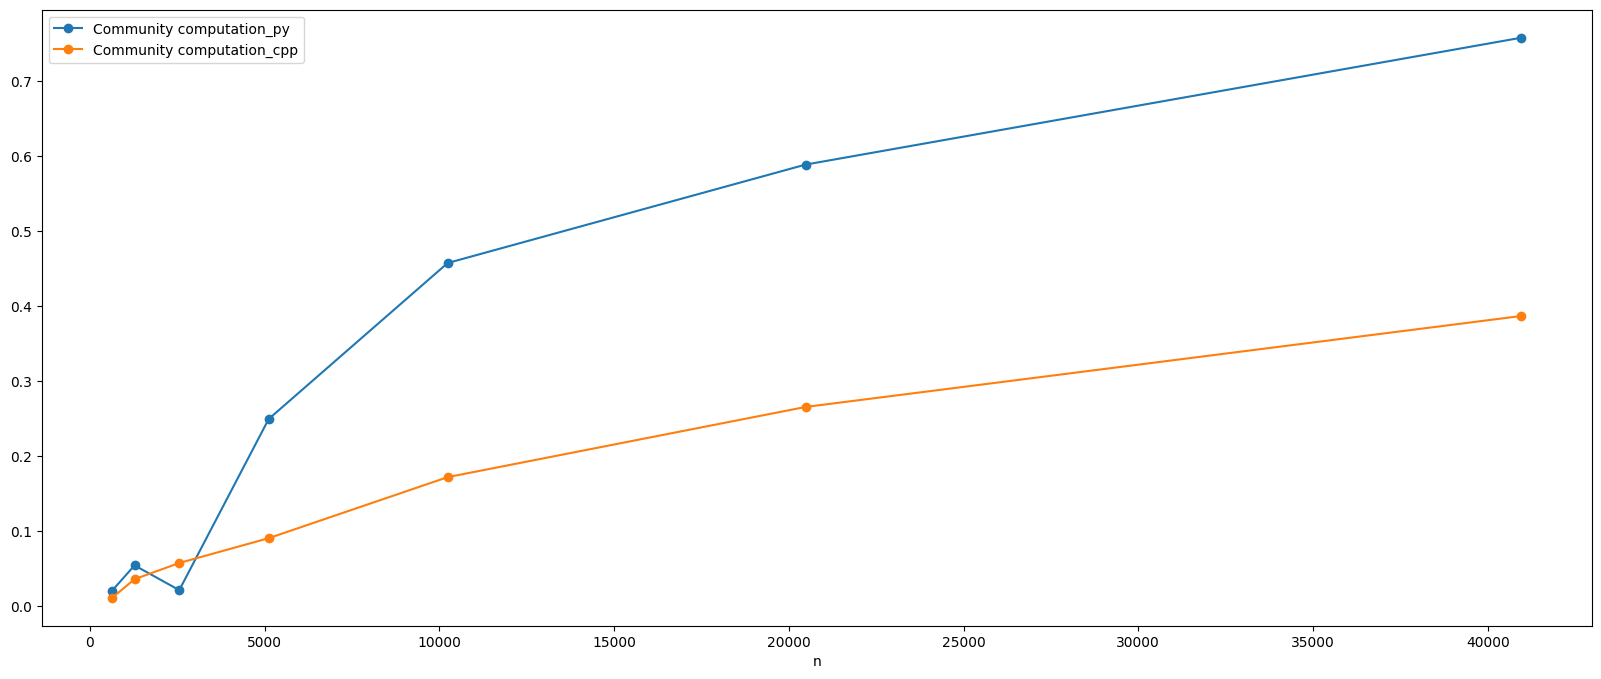

In [213]:
plot_column(comparison, ['Community computation_py', 'Community computation_cpp'], one_ax=True)

##### Compare nodesComputation

In [214]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.030346,0.035598
1280,0.170307,0.058270
2560,0.372787,0.084543
5120,0.561116,0.275916
10240,2.072425,0.462344
20480,7.077939,1.120295
40960,19.700940,3.956231


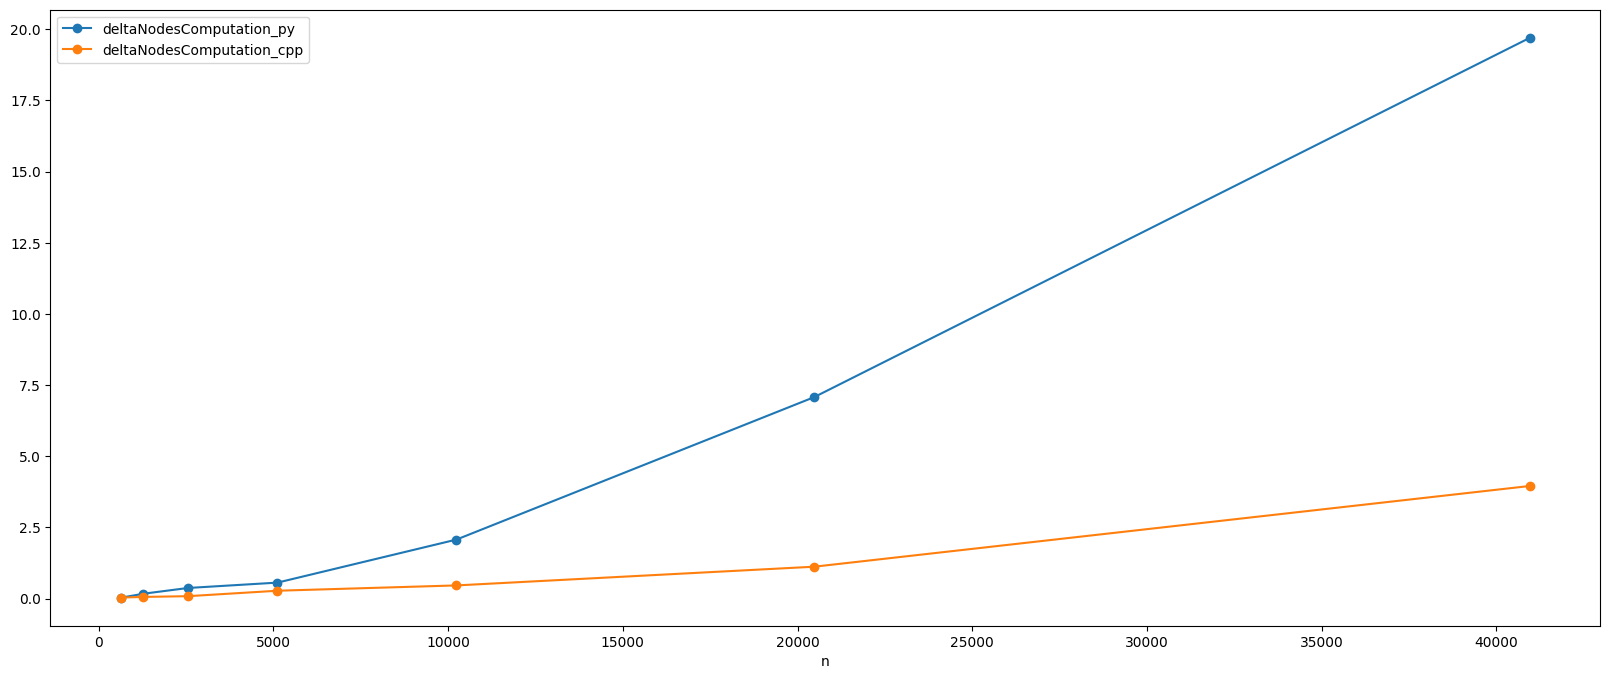

In [215]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [216]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,1.008759,1.229430
1280,1.419136,1.469972
2560,7.492976,9.343578
5120,18.657394,28.437199
10240,63.546186,91.837308
20480,172.784326,348.211790
40960,573.242964,643.904615


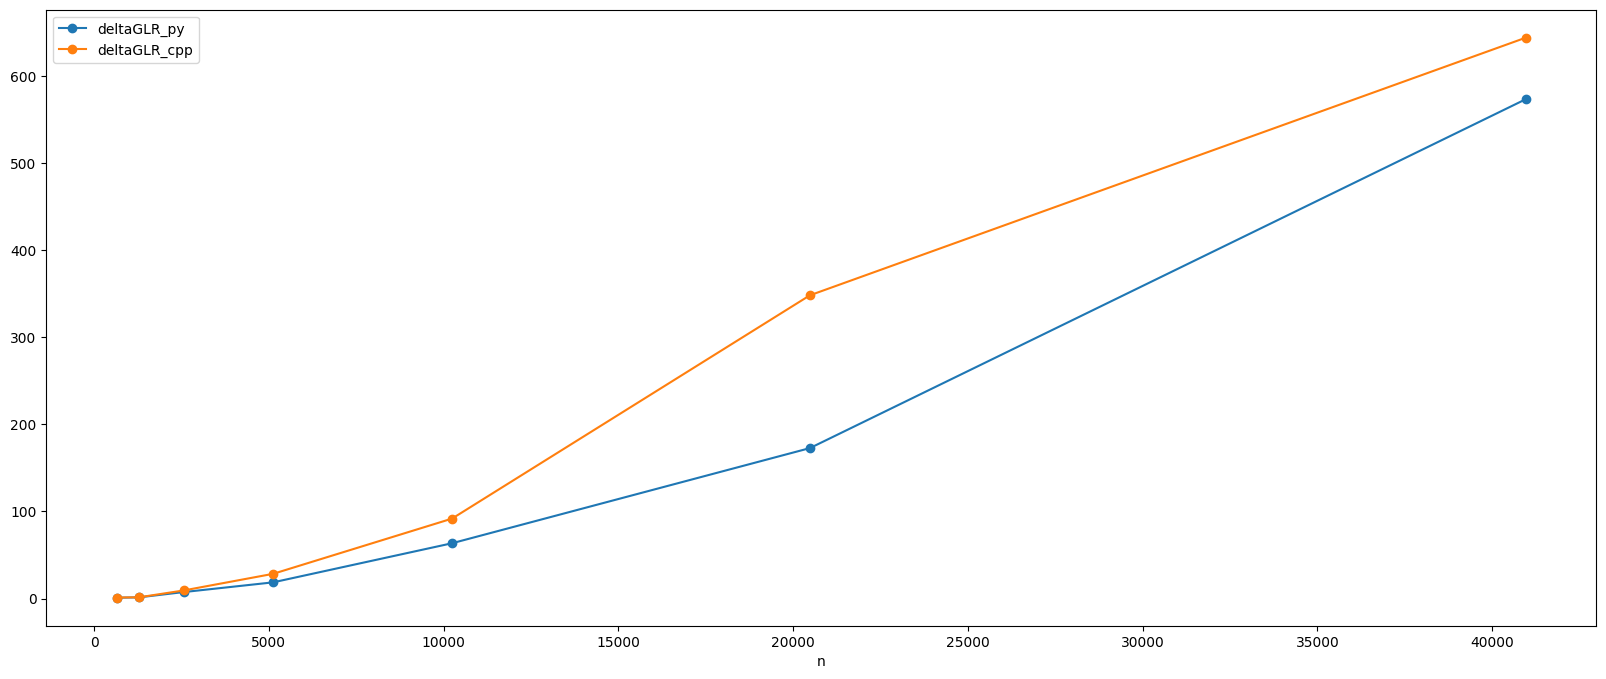

In [217]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP1)

##### Filter results

In [218]:
dexpnode = all_data[ all_data["Flag"] == "2expnode"]
dexpnode = dexpnode[dexpnode["Code"] == programming_language]

##### Set number of nodes as ID

In [219]:
dexpnode.set_index("n", inplace=True)
dexpnode.sort_index(inplace=True)

##### Show total time

In [220]:
dexpnode[["Total"]]

,Total
n,
640,1.276348
1280,1.564362
2560,9.486185
5120,28.804764
10240,92.473924
20480,349.602380
40960,648.258891


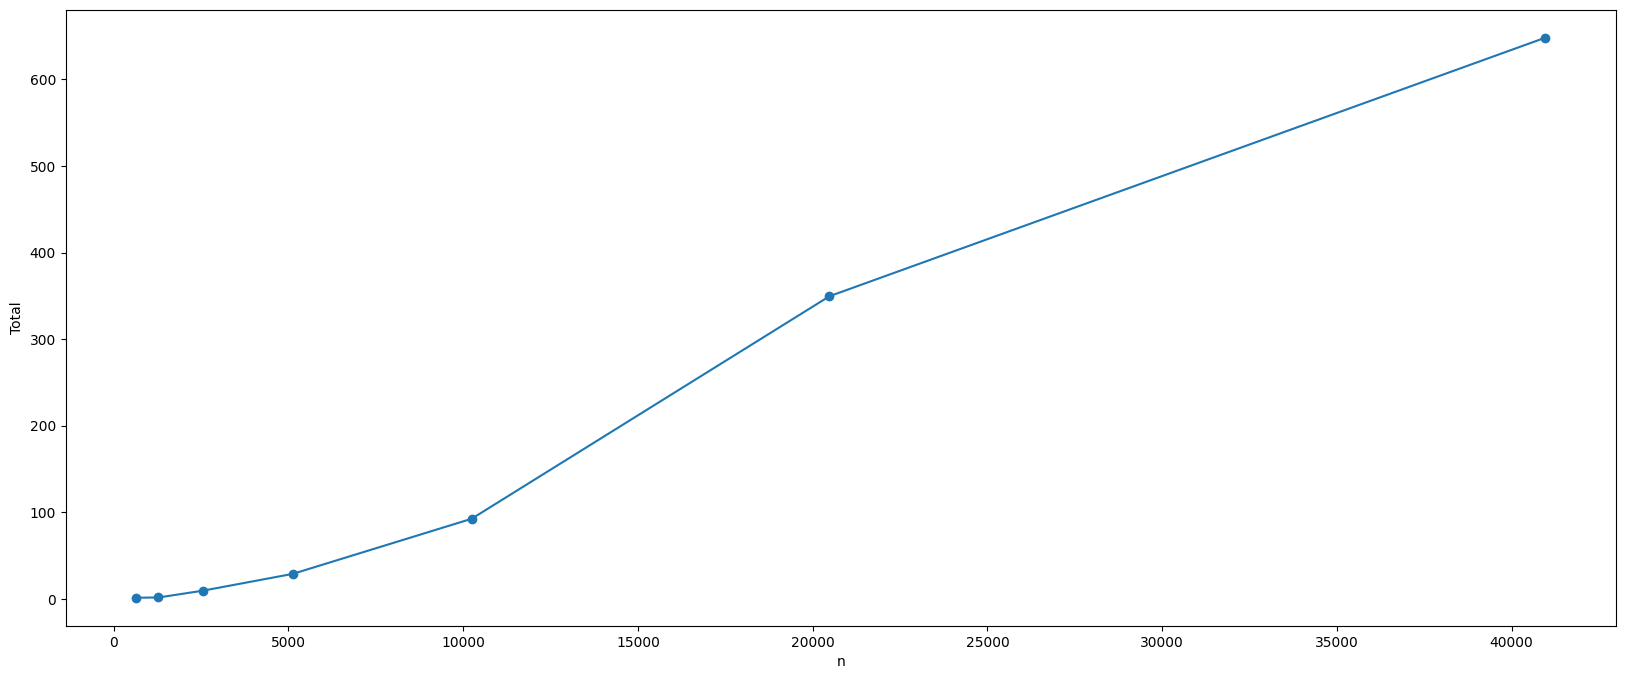

In [221]:
plot_column(dexpnode, ["Total"])

##### Show partitionsComputation

In [222]:
dexpnode[["Community computation"]]

,Community computation
n,
640,0.011232
1280,0.035937
2560,0.057544
5120,0.090647
10240,0.172034
20480,0.265604
40960,0.386909


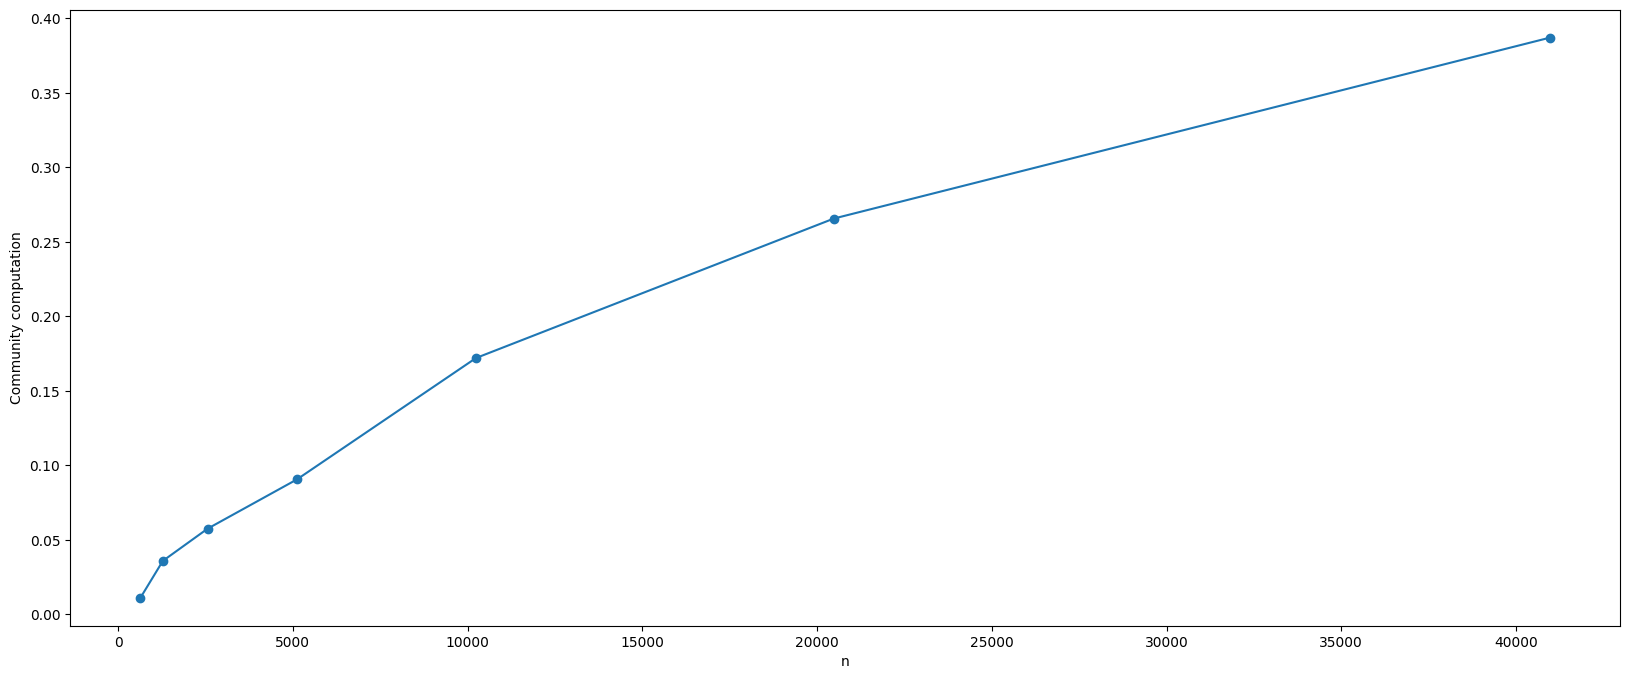

In [223]:
plot_column(dexpnode, ["Community computation"])

##### Show nodesComputation

In [224]:
dexpnode[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.035598
1280,0.058270
2560,0.084543
5120,0.275916
10240,0.462344
20480,1.120295
40960,3.956231


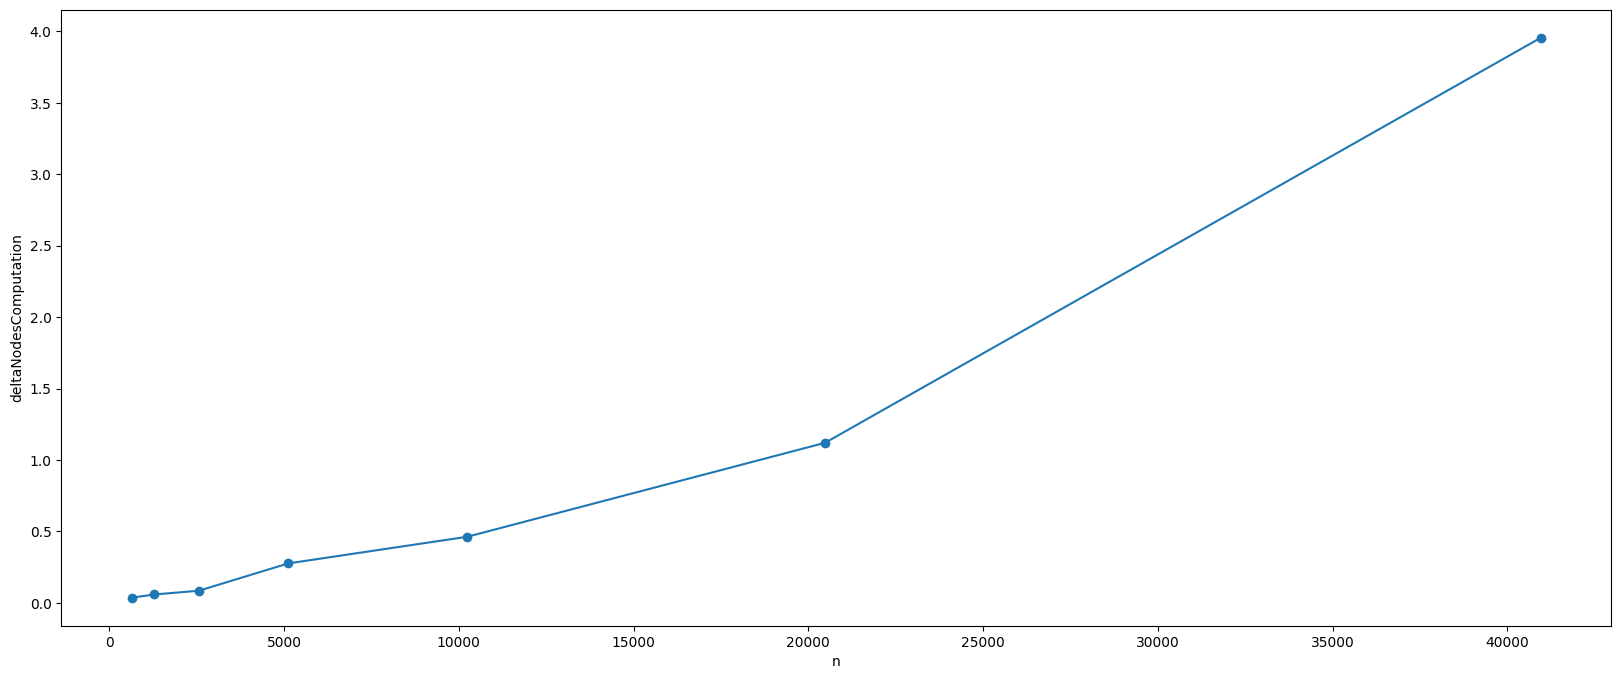

In [225]:
plot_column(dexpnode, ["deltaNodesComputation"])

##### Show deltaGLR

In [226]:
dexpnode[["deltaGLR"]]

,deltaGLR
n,
640,1.229430
1280,1.469972
2560,9.343578
5120,28.437199
10240,91.837308
20480,348.211790
40960,643.904615


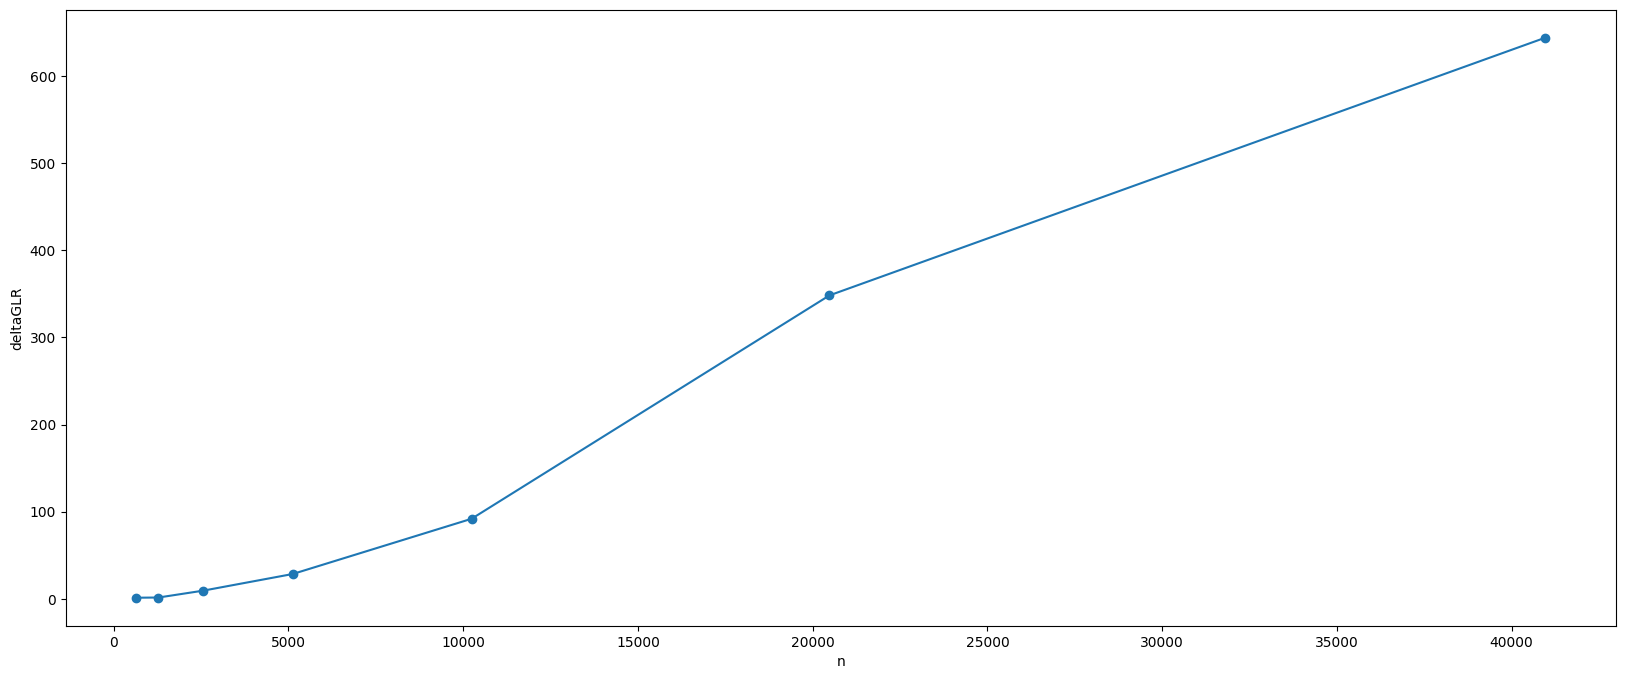

In [227]:
plot_column(dexpnode, ["deltaGLR"])

# Programming Language Comparison (EXP2)

##### Filter results

In [228]:
all_comparison = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]

In [229]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,10240,0.076463,0.877427,49.523101,49.524659,0.800964,48.645674,0.012957,0.211121,67.215487,67.217266,0.198164,67.004366
1,"2expnode(n=1280, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,1280,0.006699,0.077879,1.516051,1.516336,0.071180,1.438172,0.006231,0.056307,1.462929,1.463108,0.050076,1.406622
2,"2expnode(n=20480, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,20480,0.033712,2.165051,153.668088,153.671923,2.131339,151.503037,0.034867,0.350966,209.491742,209.495447,0.316099,209.140776
3,"2expnode(n=2560, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,2560,0.007239,0.393742,7.859056,7.859581,0.386503,7.465314,0.020061,0.110855,8.541427,8.541848,0.090794,8.430572
4,"2expnode(n=40960, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,40960,0.071342,7.968201,553.460172,553.484491,7.896858,545.491971,0.034551,3.266895,675.808144,675.816235,3.232344,672.541249
5,"2expnode(n=5120, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,5120,0.056638,0.656639,16.195146,16.195926,0.600000,15.538508,0.010687,0.122292,18.889932,18.890725,0.111605,18.767640
6,"2expnode(n=640, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,640,0.013811,0.076439,1.056673,1.056838,0.062629,0.980234,0.004539,0.020019,1.040790,1.040871,0.015480,1.020771


##### Set number of nodes as ID

In [230]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [231]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.056838,1.040871
1280,1.516336,1.463108
2560,7.859581,8.541848
5120,16.195926,18.890725
10240,49.524659,67.217266
20480,153.671923,209.495447
40960,553.484491,675.816235


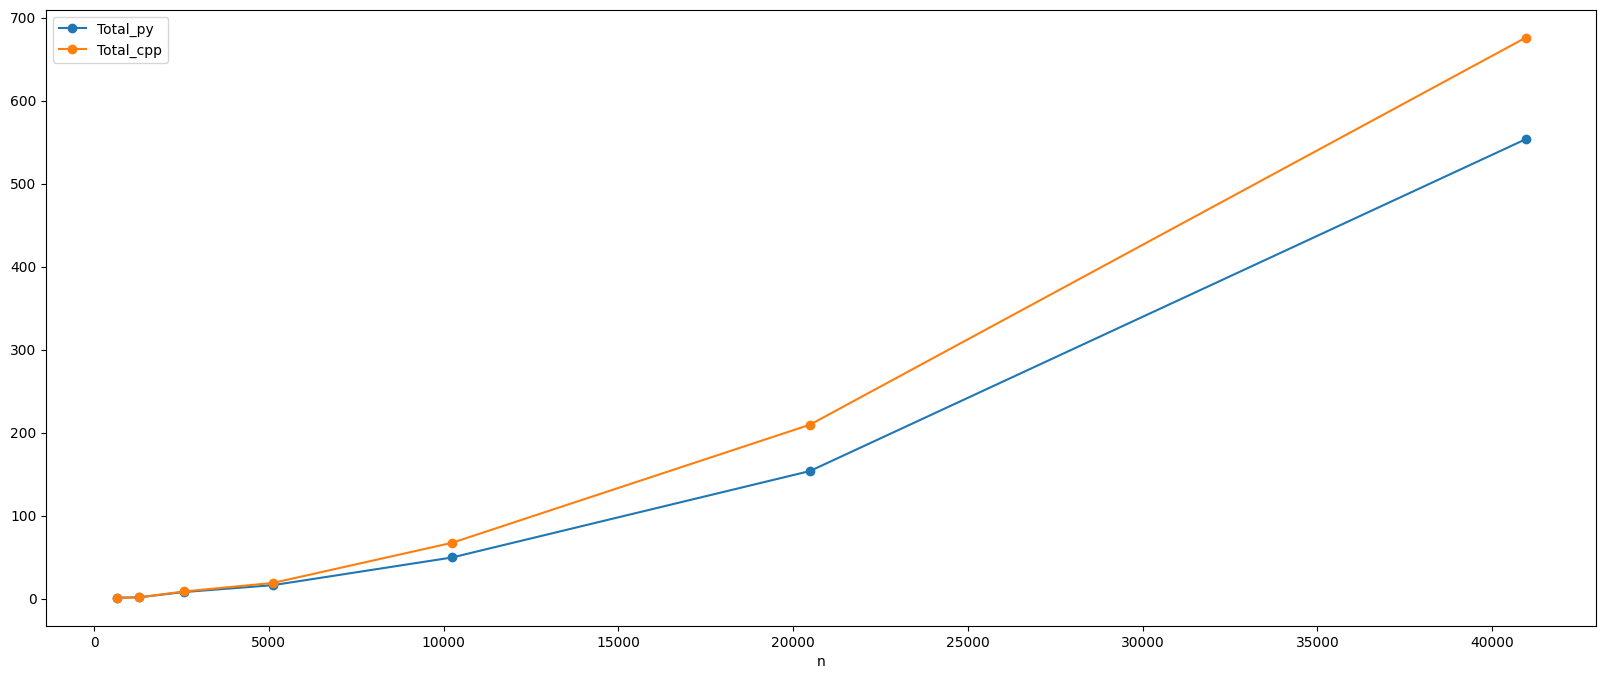

In [232]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare nodesComputation

In [233]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.062629,0.015480
1280,0.071180,0.050076
2560,0.386503,0.090794
5120,0.600000,0.111605
10240,0.800964,0.198164
20480,2.131339,0.316099
40960,7.896858,3.232344


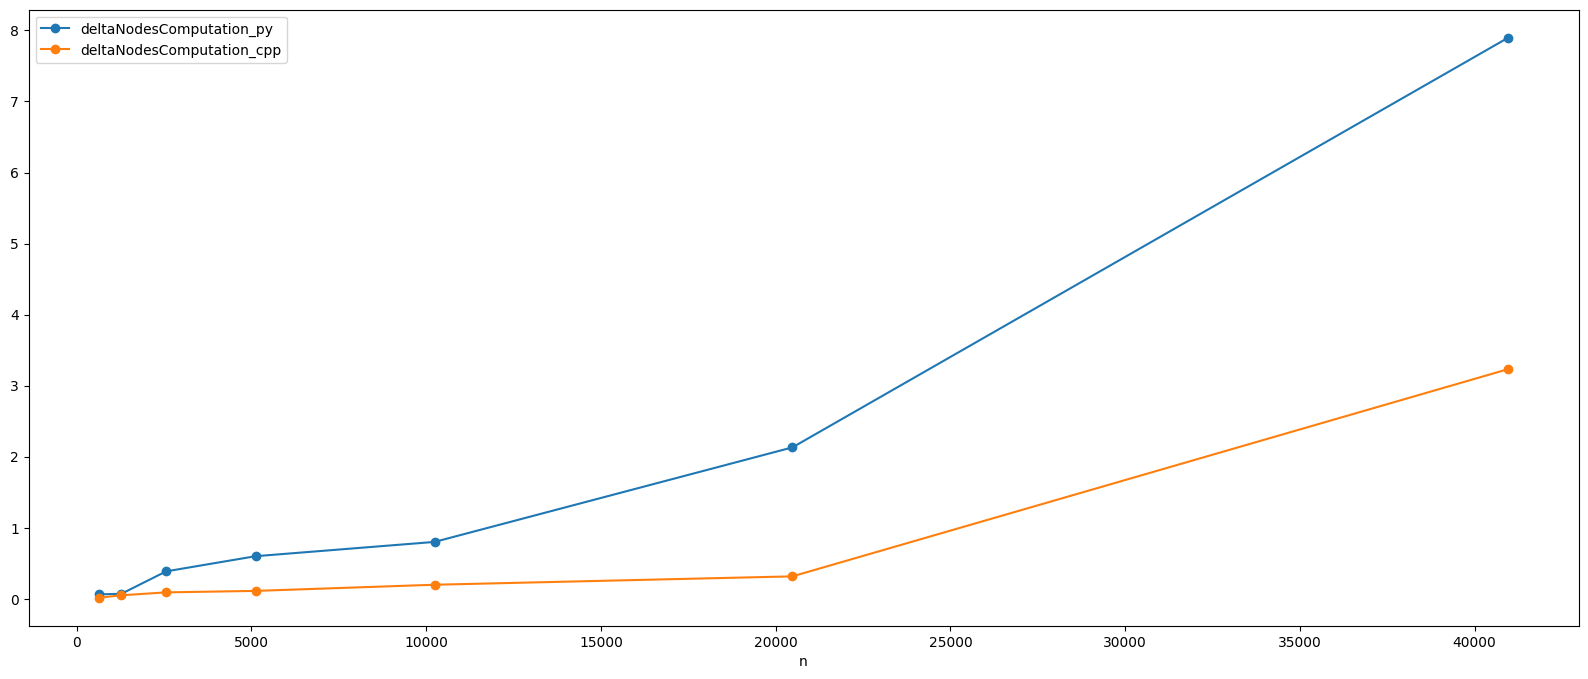

In [234]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [235]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,0.980234,1.020771
1280,1.438172,1.406622
2560,7.465314,8.430572
5120,15.538508,18.767640
10240,48.645674,67.004366
20480,151.503037,209.140776
40960,545.491971,672.541249


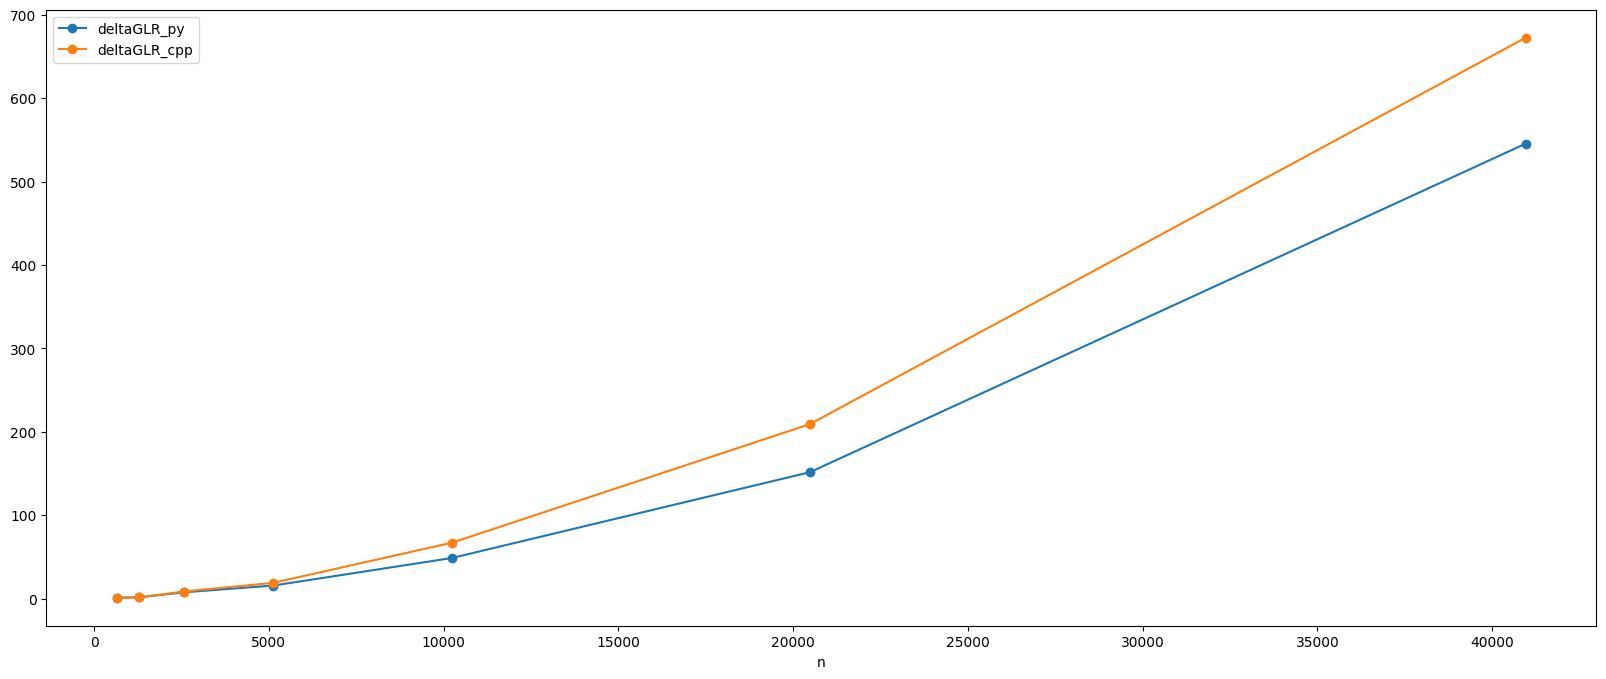

In [236]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP2)

##### Filter results

In [237]:
dexpnode_ten = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]
dexpnode_ten = dexpnode_ten[dexpnode_ten["Code"] == programming_language]

##### Set number of nodes as ID

In [238]:
dexpnode_ten.set_index("n", inplace=True)
dexpnode_ten.sort_index(inplace=True)

##### Show total time

In [239]:
dexpnode_ten[["Total"]]

,Total
n,
640,1.040871
1280,1.463108
2560,8.541848
5120,18.890725
10240,67.217266
20480,209.495447
40960,675.816235


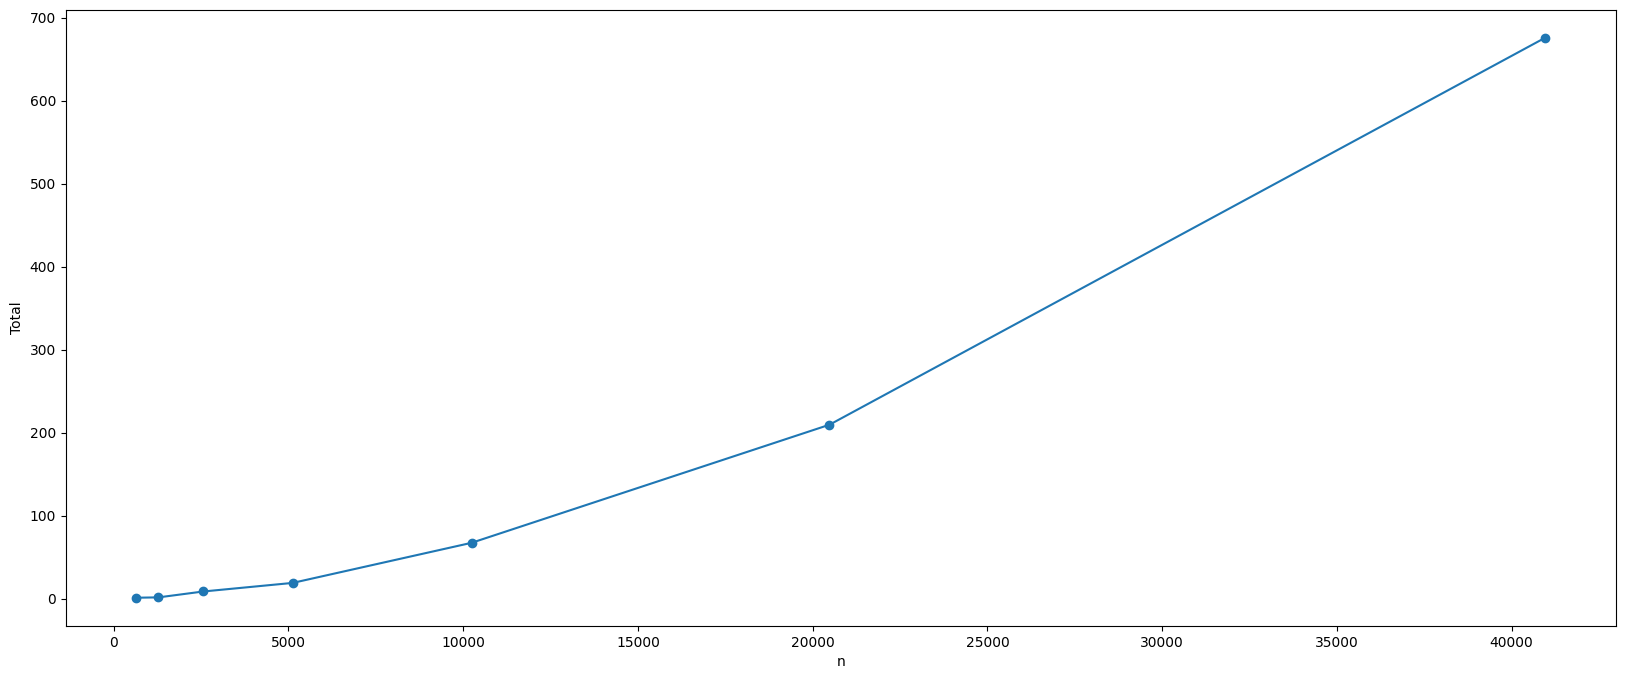

In [240]:
plot_column(dexpnode_ten, ["Total"])

##### Show nodesComputation

In [241]:
dexpnode_ten[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.015480
1280,0.050076
2560,0.090794
5120,0.111605
10240,0.198164
20480,0.316099
40960,3.232344


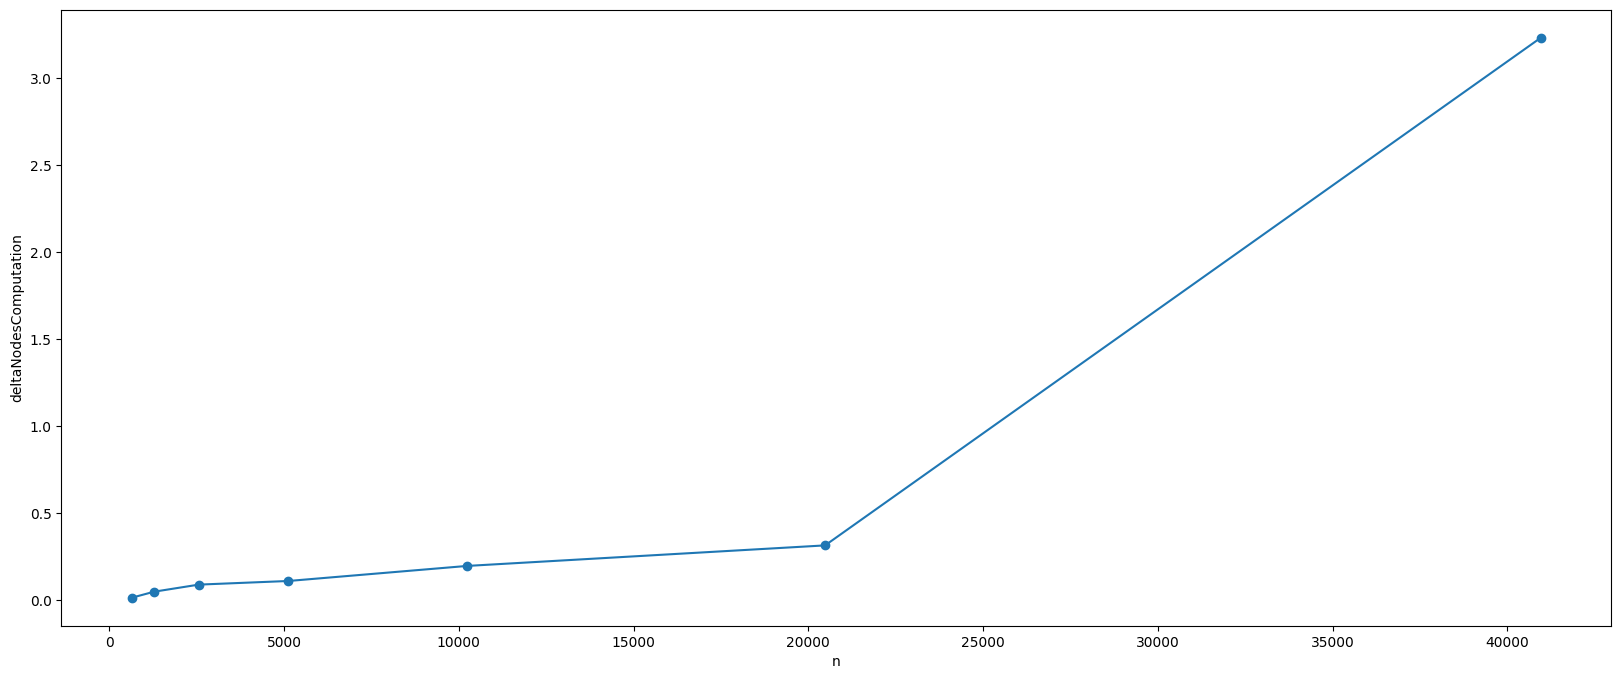

In [242]:
plot_column(dexpnode_ten, ["deltaNodesComputation"])

##### Show deltaGLR

In [243]:
dexpnode_ten[["deltaGLR"]]

,deltaGLR
n,
640,1.020771
1280,1.406622
2560,8.430572
5120,18.767640
10240,67.004366
20480,209.140776
40960,672.541249


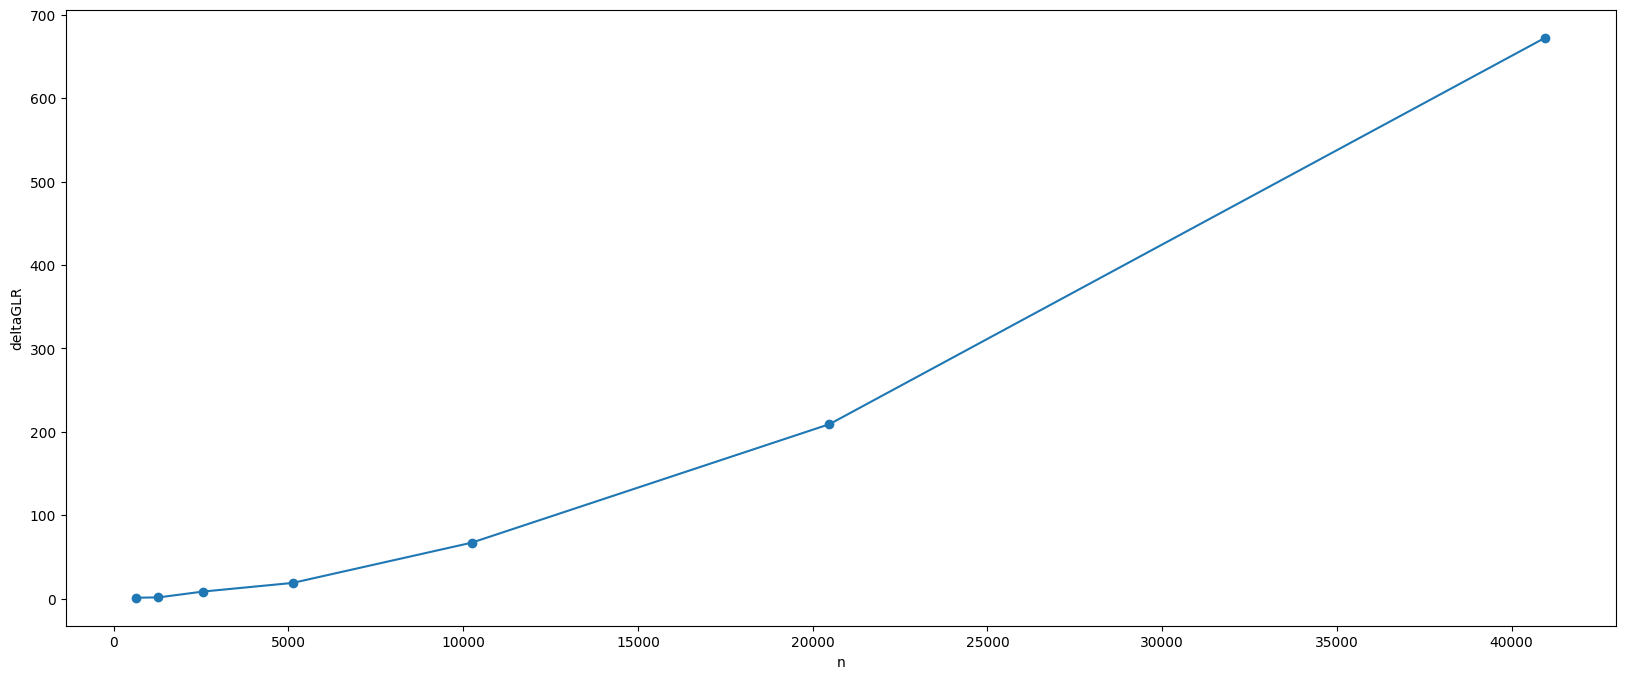

In [244]:
plot_column(dexpnode_ten, ["deltaGLR"])

# Double Experiment (EXP3)

##### Filter results

In [245]:
dexpcommunity = all_data[ all_data["Flag"] == "2expcommunity"]
dexpcommunity = dexpcommunity[dexpcommunity["Code"] == programming_language]

##### Set number of community as ID

In [246]:
def get_number_community(partition_name):
    partition_name = partition_name.split("/")[-1]
    partition_id = partition_name[len("partition"):]
    return int(partition_id)

dexpcommunity["#community"] = dexpcommunity['Partition'].apply(get_number_community)
dexpcommunity.set_index("#community", inplace=True)
dexpcommunity.sort_index(inplace=True)

##### Show total time

In [247]:
dexpcommunity[["Total"]]

,Total
#community,
2,333.369346
4,354.963558
8,396.794755
16,410.086808
32,467.145063
64,516.819374
128,468.918016


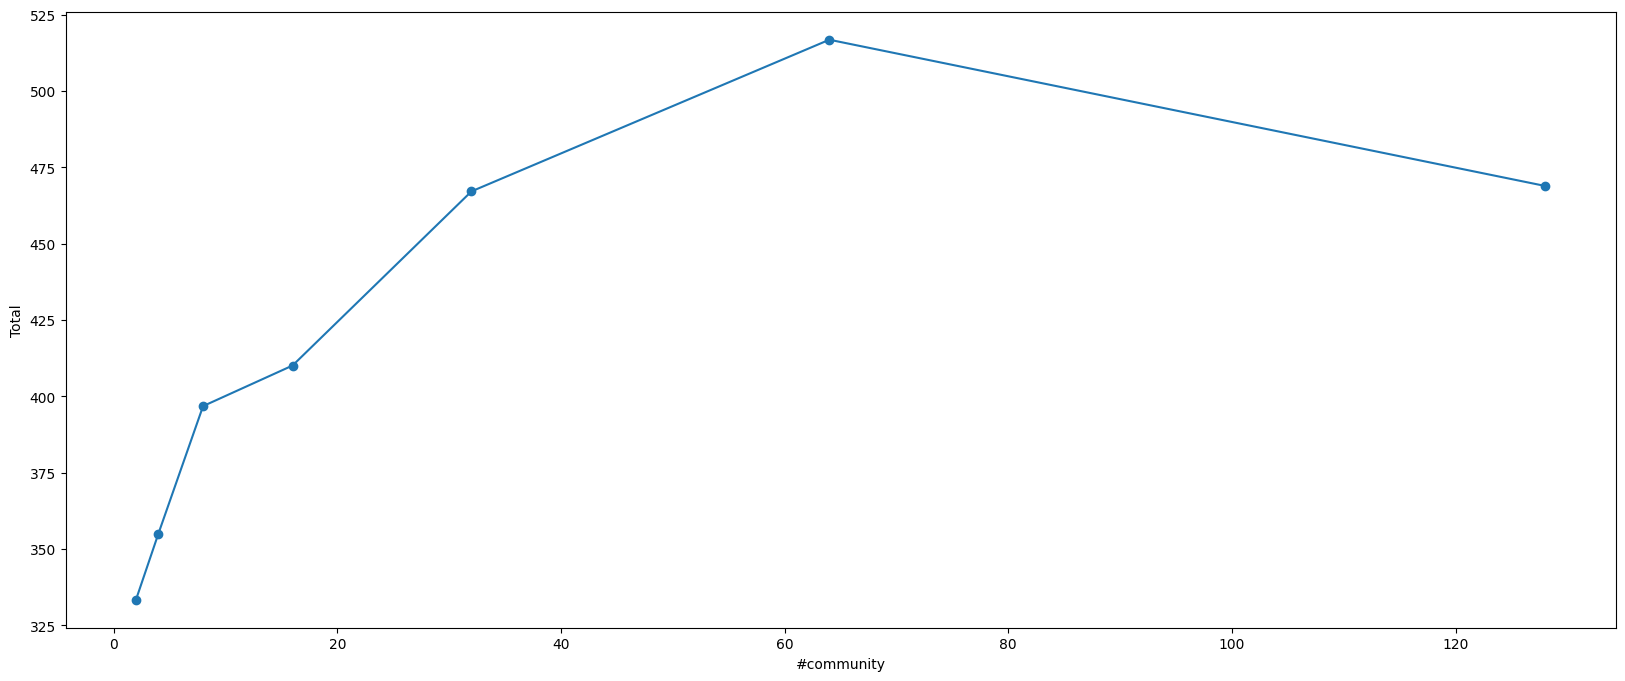

In [248]:
plot_column(dexpcommunity, ["Total"])

##### Show nodesComputation

In [249]:
dexpcommunity[["deltaNodesComputation"]]

,deltaNodesComputation
#community,
2,5.775984
4,1.913278
8,0.790779
16,1.288723
32,1.443407
64,2.016500
128,2.641704


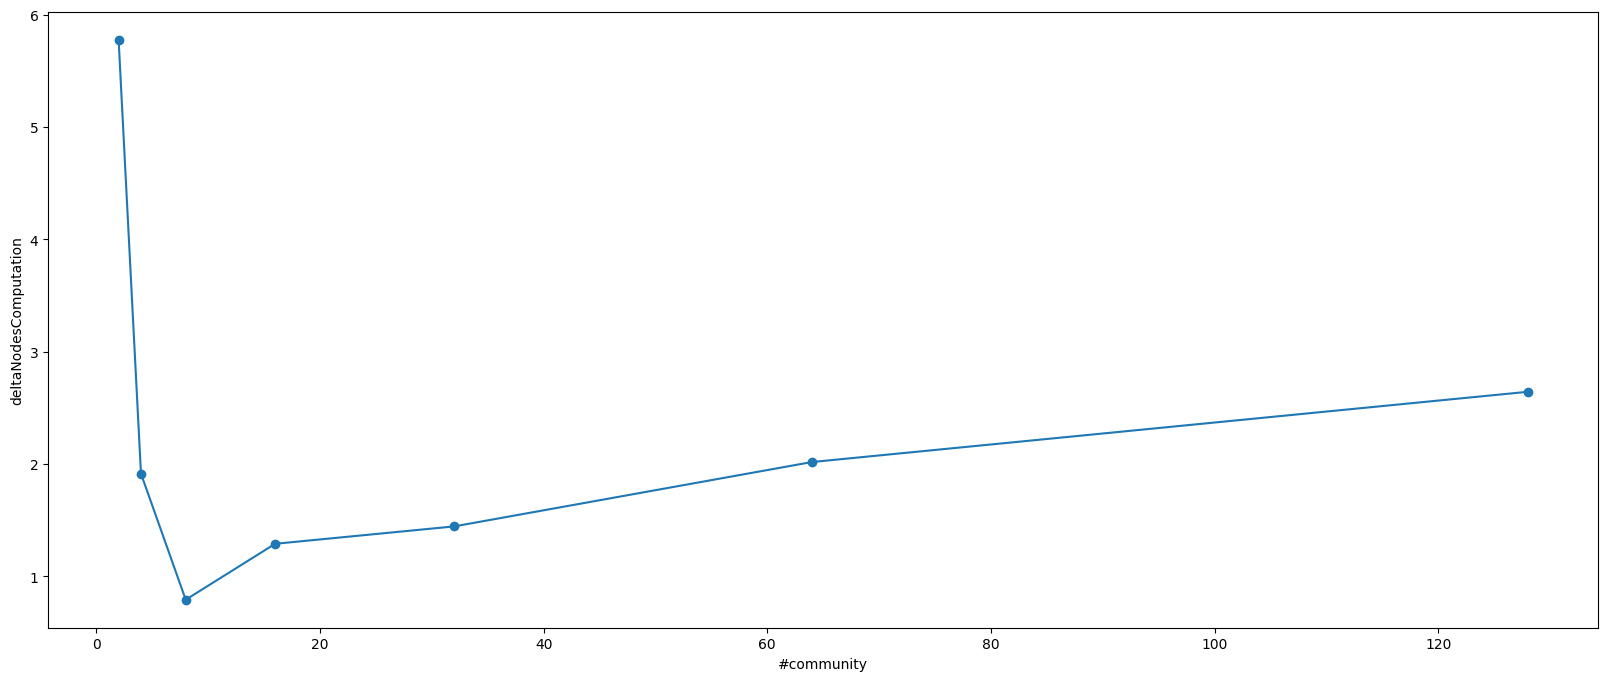

In [250]:
plot_column(dexpcommunity, ["deltaNodesComputation"])

##### Show deltaGLR

In [251]:
dexpcommunity[["deltaGLR"]]

,deltaGLR
#community,
2,327.455927
4,353.009847
8,395.876167
16,408.632015
32,465.494999
64,514.342299
128,465.914077


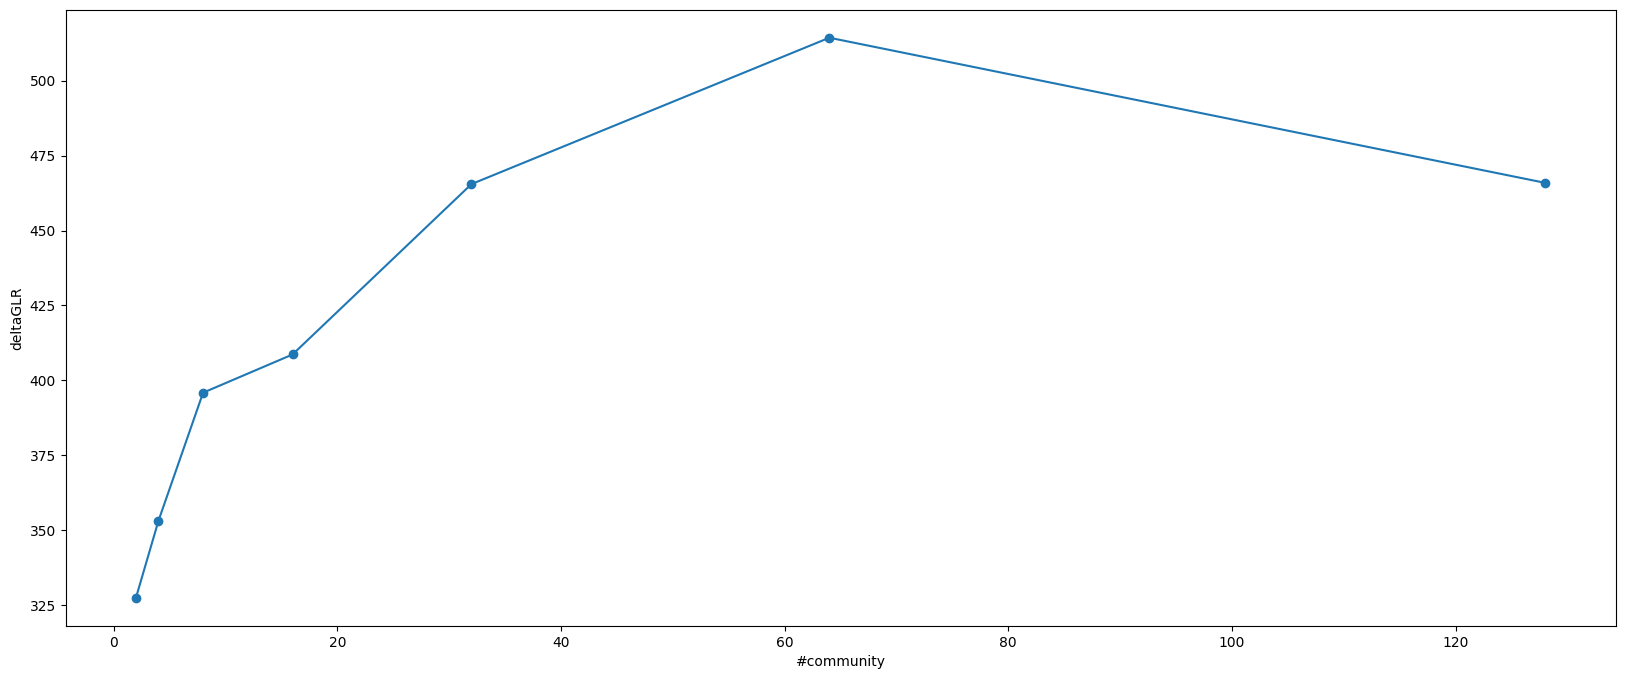

In [252]:
plot_column(dexpcommunity, ["deltaGLR"])

# Double Experiment (EXP4)

##### Filter results

In [253]:
dexpedge = all_data[ all_data["Flag"] == "2expedge"]
dexpedge = dexpedge[dexpedge["Code"] == programming_language]

##### Set number of edges as ID

In [254]:
dexpedge.set_index("m", inplace=True)
dexpedge.sort_index(inplace=True)

##### Show total time

In [255]:
dexpedge[["Total"]]

,Total
m,
639,0.292030
1278,0.237335
2556,0.453809
5112,0.430859
10224,1.118243
20448,0.717383
40896,1.321493
81792,3.548007
163584,5.495569


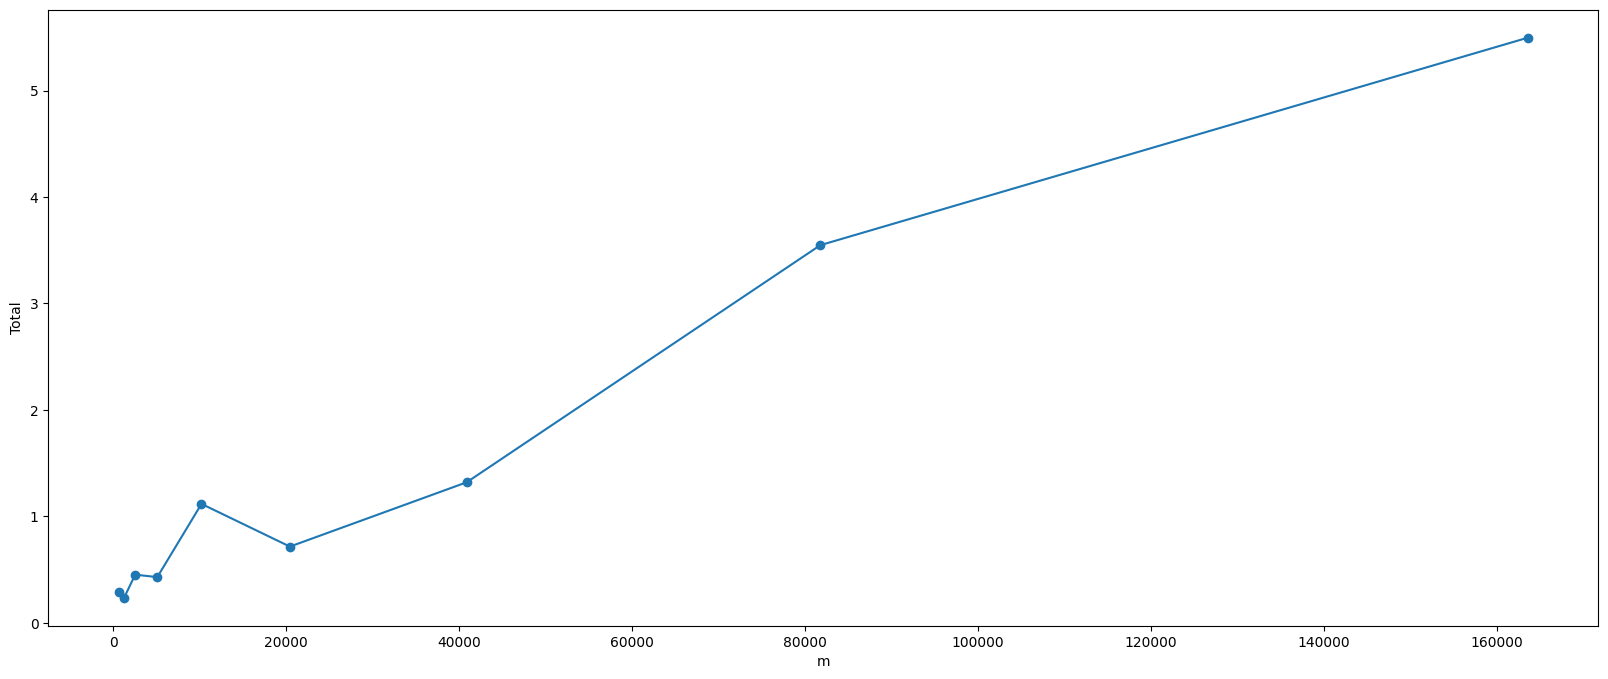

In [256]:
plot_column(dexpedge, ["Total"])

##### Show partitionsComputation

In [257]:
dexpedge[["Community computation"]]

,Community computation
m,
639,0.134443
1278,0.006216
2556,0.012383
5112,0.026923
10224,0.436834
20448,0.116382
40896,0.021626
81792,0.091859
163584,0.040110


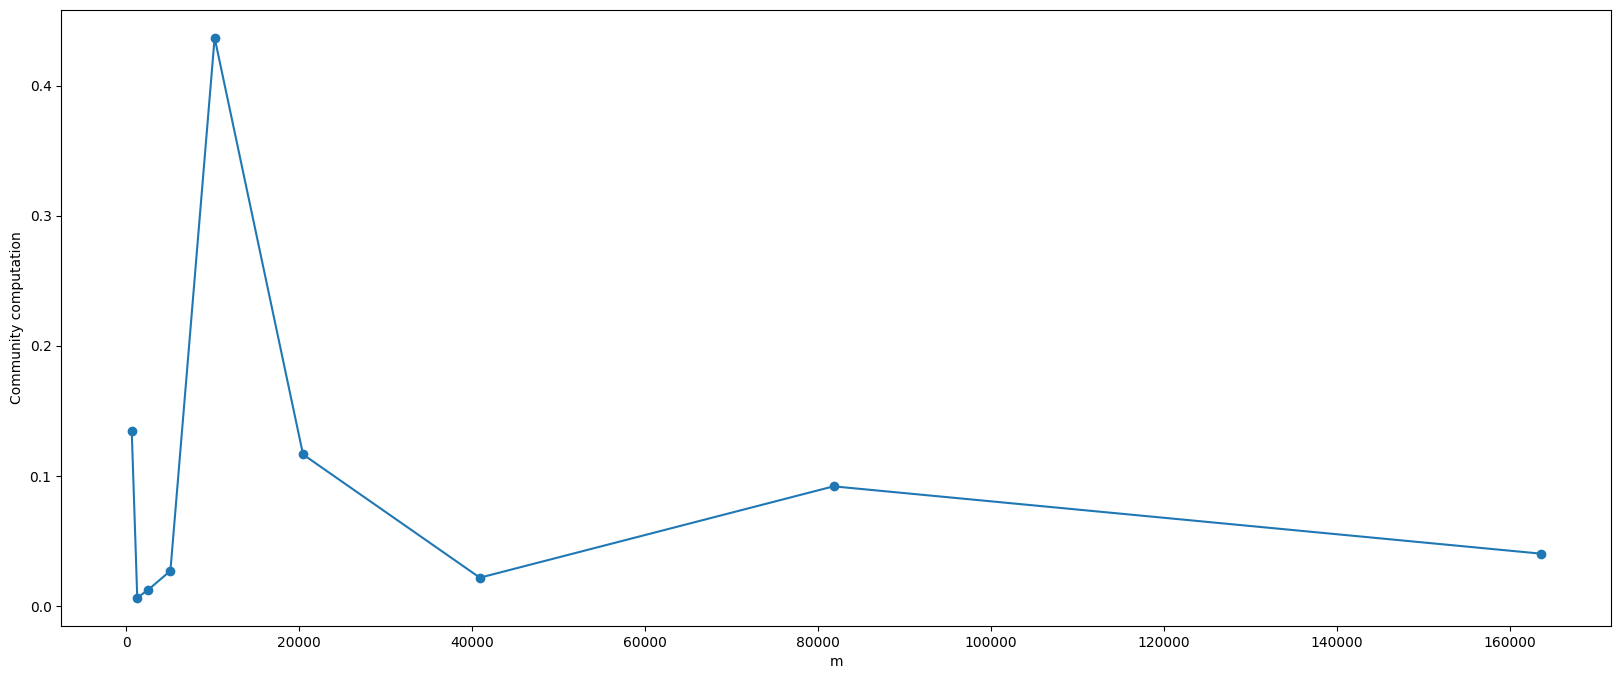

In [258]:
plot_column(dexpedge, ["Community computation"])

##### Show nodesComputation

In [259]:
dexpedge[["deltaNodesComputation"]]

,deltaNodesComputation
m,
639,0.005511
1278,0.016324
2556,0.090676
5112,0.009120
10224,0.016200
20448,0.009914
40896,0.051937
81792,0.037855
163584,0.046259


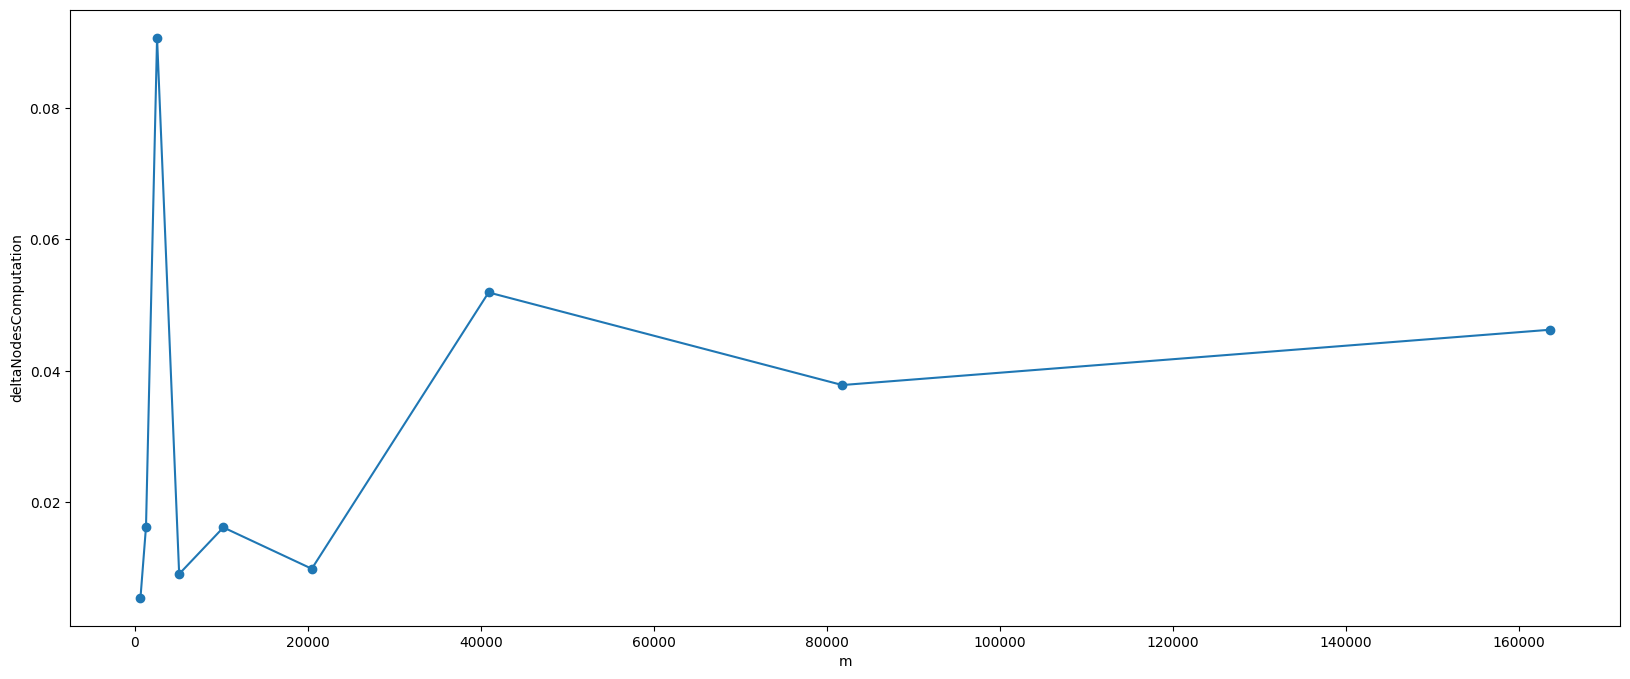

In [260]:
plot_column(dexpedge, ["deltaNodesComputation"])

##### Show deltaGLR

In [261]:
dexpedge[["deltaGLR"]]

,deltaGLR
m,
639,0.151887
1278,0.214641
2556,0.350607
5112,0.394678
10224,0.665073
20448,0.590957
40896,1.247796
81792,3.418155
163584,5.409024


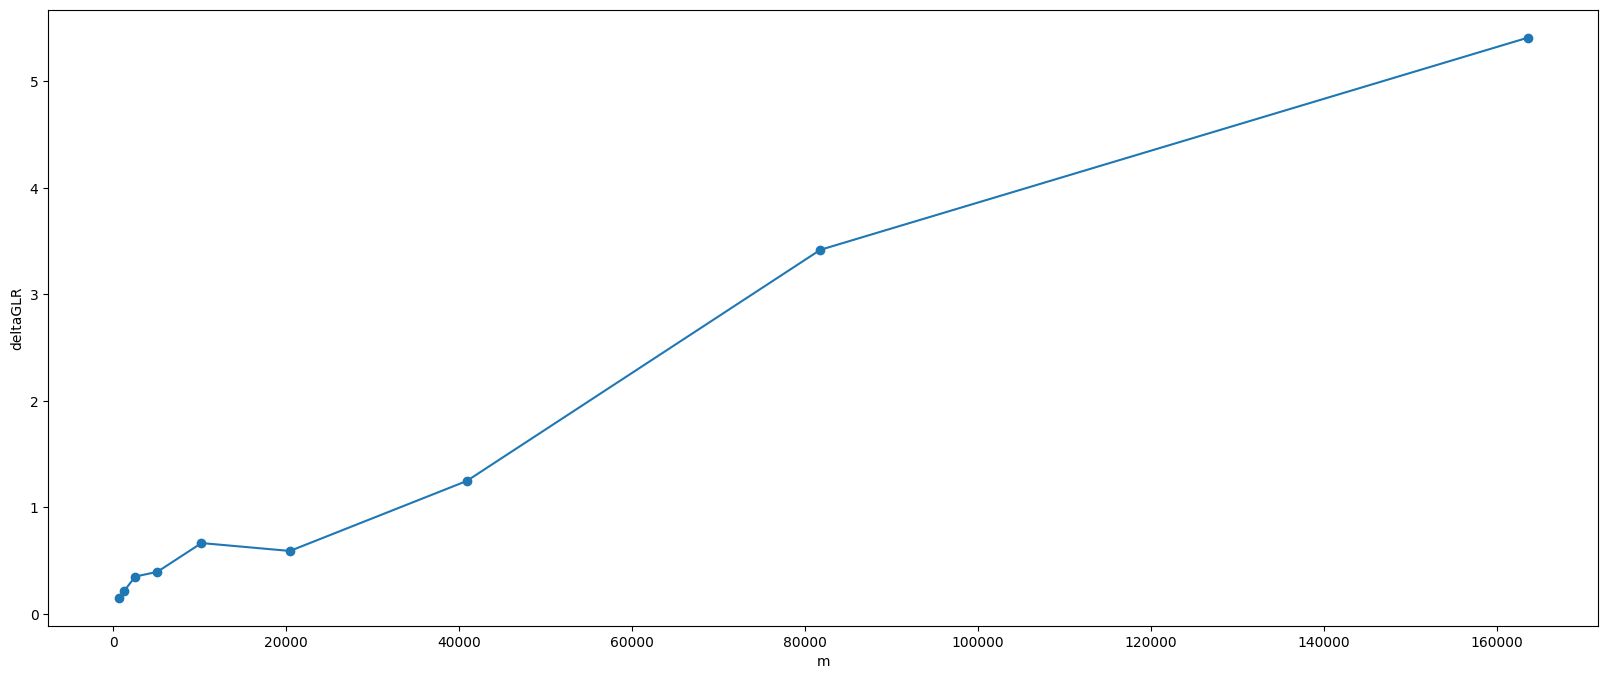

In [262]:
plot_column(dexpedge, ["deltaGLR"])

# Double Experiment (EXP5)

##### Filter results

In [263]:
dexpnodeundirected = all_data[ all_data["Flag"] == "2expnodeundirected(fixpartition)"]
dexpnodeundirected = dexpnodeundirected[dexpnodeundirected["Code"] == programming_language]

##### Set number of node as ID

In [264]:
dexpnodeundirected.set_index("n", inplace=True)
dexpnodeundirected.sort_index(inplace=True)

##### Show total time

In [265]:
dexpnodeundirected[["Total"]]

,Total
n,
640,0.072604
1280,0.046037
2560,0.100338
5120,0.197021
10240,0.307955
20480,0.905582
40960,0.628034


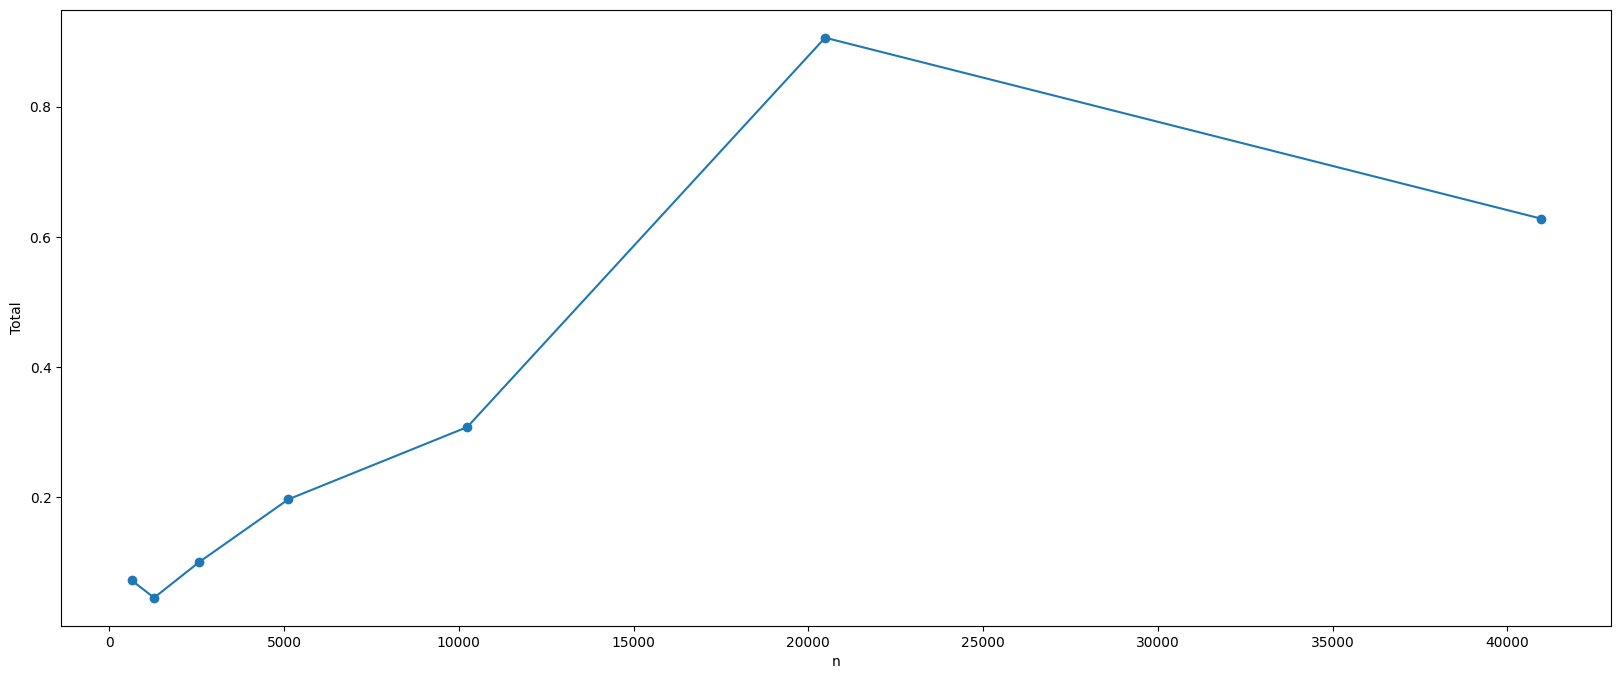

In [266]:
plot_column(dexpnodeundirected, ["Total"])

##### Show nodesComputation

In [267]:
dexpnodeundirected[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.067584
1280,0.040084
2560,0.092045
5120,0.129780
10240,0.292040
20480,0.875802
40960,0.571894


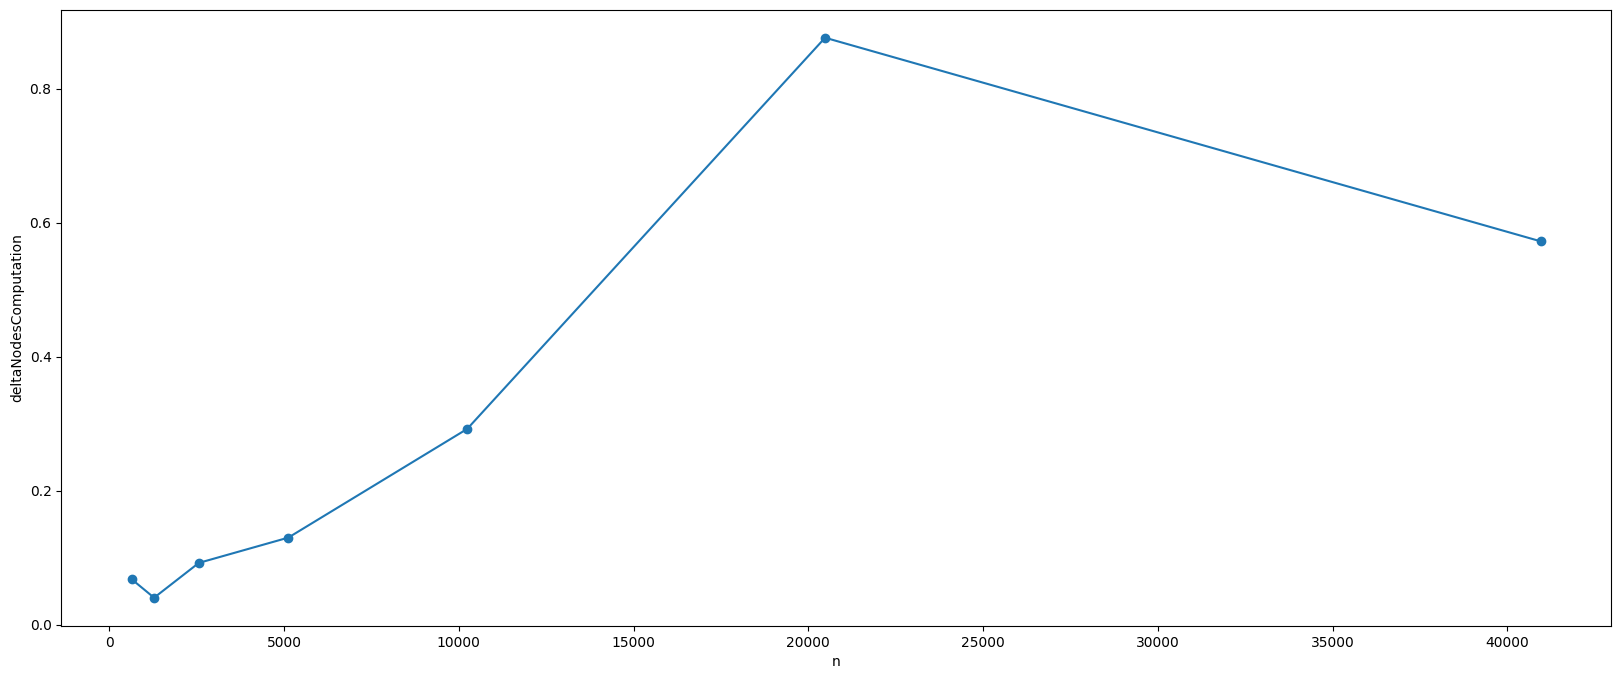

In [268]:
plot_column(dexpnodeundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [269]:
dexpnodeundirected[["deltaGLR"]]

,deltaGLR
n,
640,0.001065
1280,0.001833
2560,0.001861
5120,0.002167
10240,0.003609
20480,0.009210
40960,0.013521


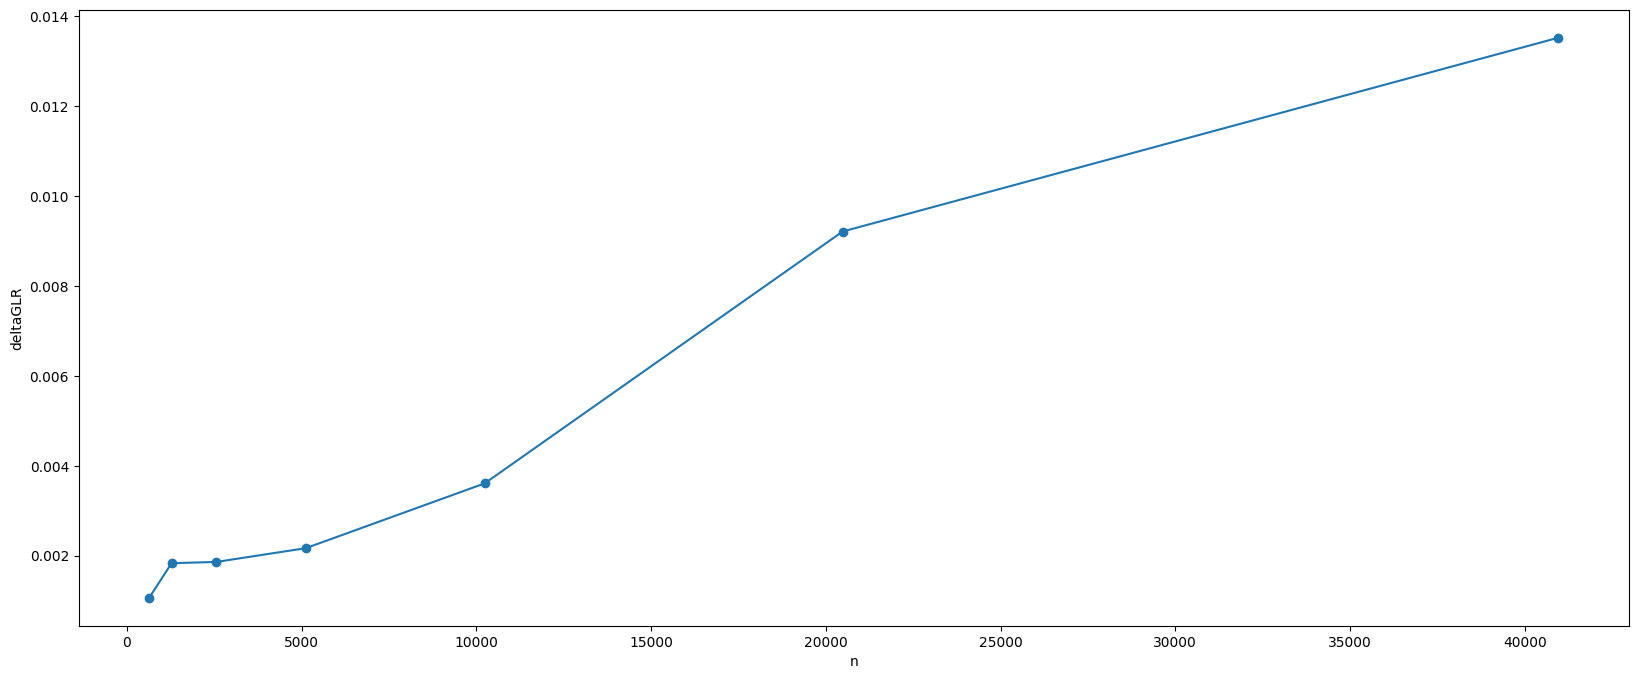

In [270]:
plot_column(dexpnodeundirected, ["deltaGLR"])

# Programming Language Comparison (EXP5)

##### Filter results

In [271]:
all_comparison = all_data[all_data["Flag"] == "2expnodeundirected(fixpartition)"]

In [272]:
py_comparison = all_comparison[all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"],
                      suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,10240,0.148718,1.932797,2.161692,2.167649,1.784079,0.228895,0.012088,0.304128,0.307737,0.307955,0.292040,0.003609
1,"2expnode(n=1280, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,1280,0.349383,0.738846,0.765155,0.765649,0.389463,0.026309,0.004076,0.044160,0.045993,0.046037,0.040084,0.001833
2,"2expnode(n=20480, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,20480,0.302935,6.173254,6.392177,6.398385,5.870319,0.218923,0.019770,0.895572,0.904782,0.905582,0.875802,0.009210
3,"2expnode(n=2560, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,2560,0.034230,0.882503,0.922369,0.923291,0.848273,0.039866,0.006341,0.098386,0.100247,0.100338,0.092045,0.001861
4,"2expnode(n=40960, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,40960,0.204601,18.896738,19.313171,19.325621,18.692137,0.416434,0.041272,0.613166,0.626687,0.628034,0.571894,0.013521
5,"2expnode(n=5120, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,5120,0.101606,2.201550,2.300187,2.337225,2.099945,0.098637,0.064975,0.194755,0.196922,0.197021,0.129780,0.002167
6,"2expnode(n=640, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,640,0.006920,0.145438,0.149805,0.150077,0.138518,0.004367,0.003934,0.071518,0.072583,0.072604,0.067584,0.001065


##### Set number of nodes as ID

In [273]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [274]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,0.150077,0.072604
1280,0.765649,0.046037
2560,0.923291,0.100338
5120,2.337225,0.197021
10240,2.167649,0.307955
20480,6.398385,0.905582
40960,19.325621,0.628034


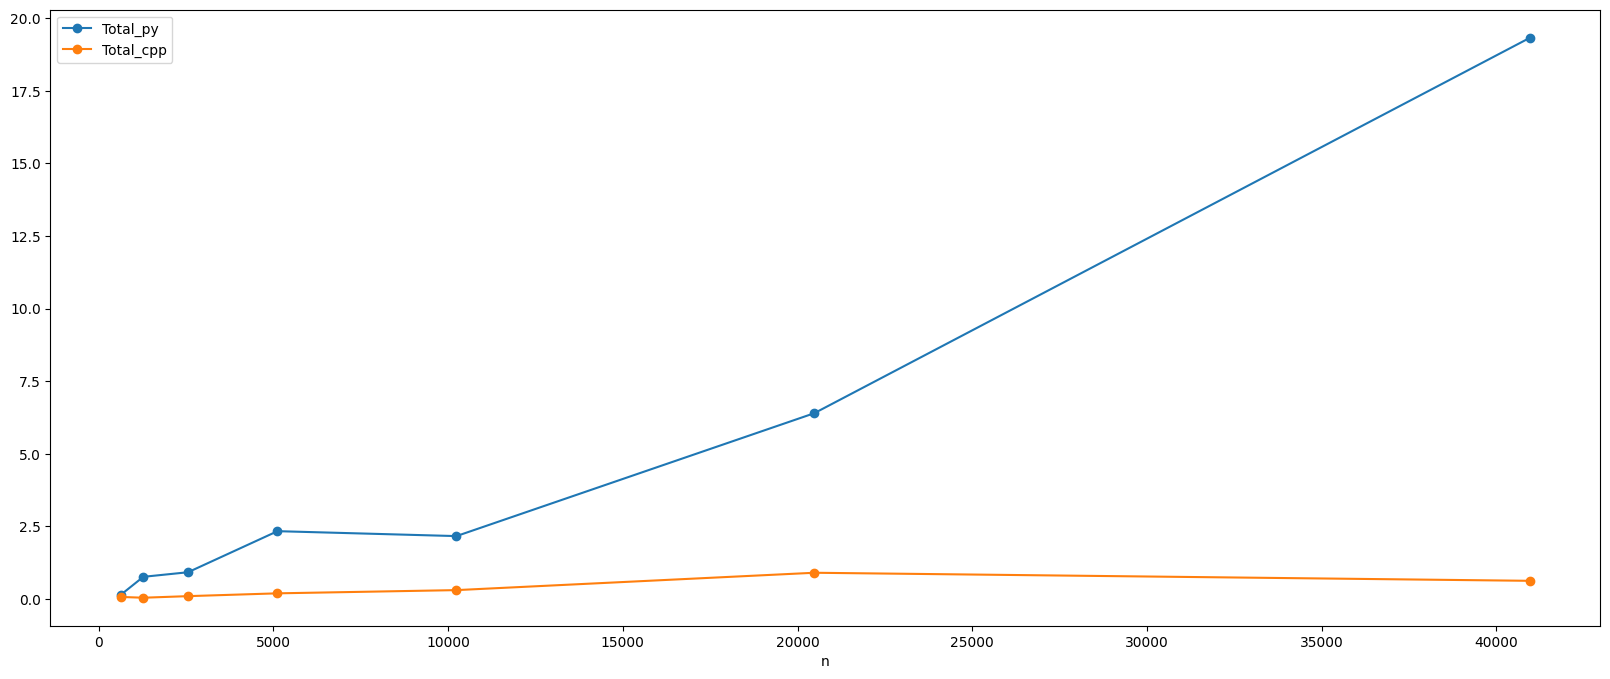

In [275]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare nodesComputation

In [276]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.138518,0.067584
1280,0.389463,0.040084
2560,0.848273,0.092045
5120,2.099945,0.129780
10240,1.784079,0.292040
20480,5.870319,0.875802
40960,18.692137,0.571894


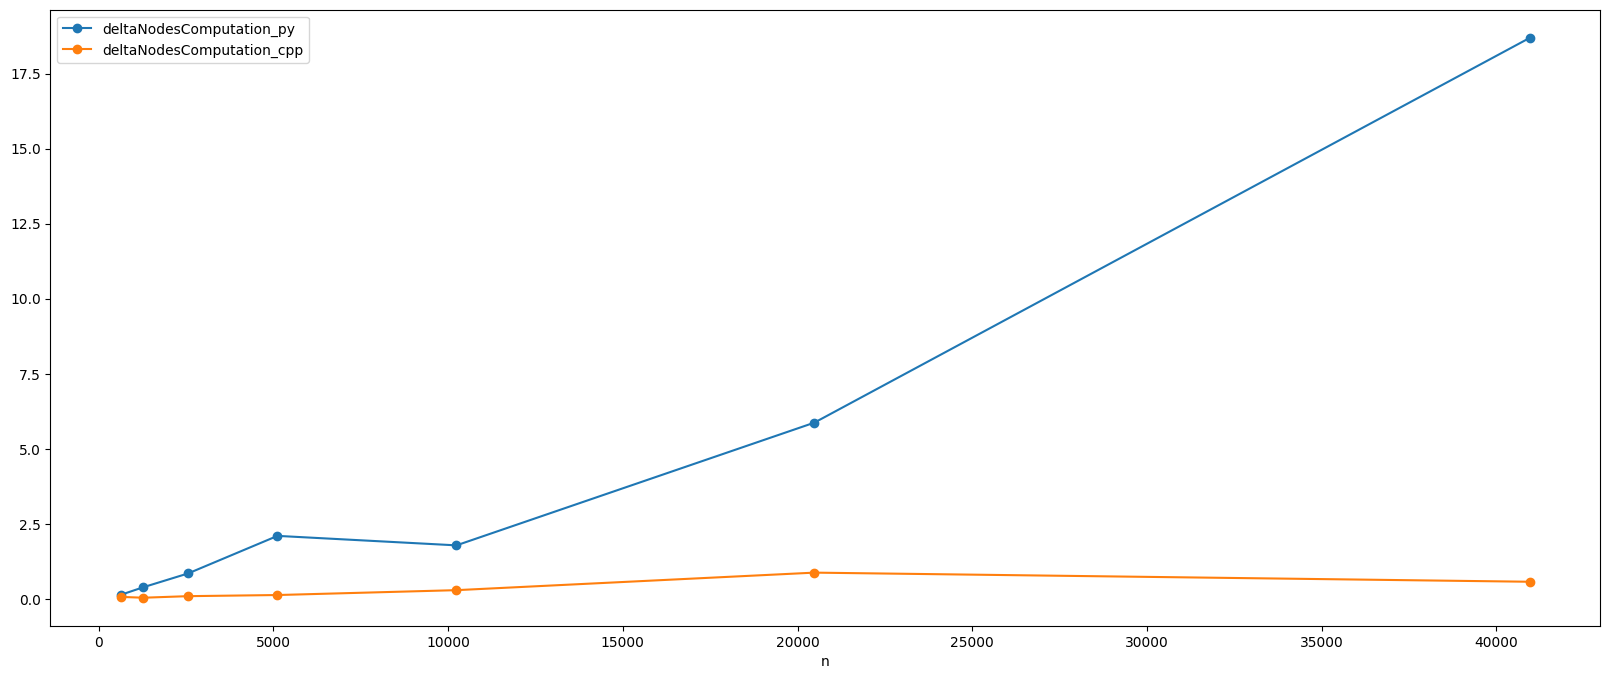

In [277]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [278]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,0.004367,0.001065
1280,0.026309,0.001833
2560,0.039866,0.001861
5120,0.098637,0.002167
10240,0.228895,0.003609
20480,0.218923,0.009210
40960,0.416434,0.013521


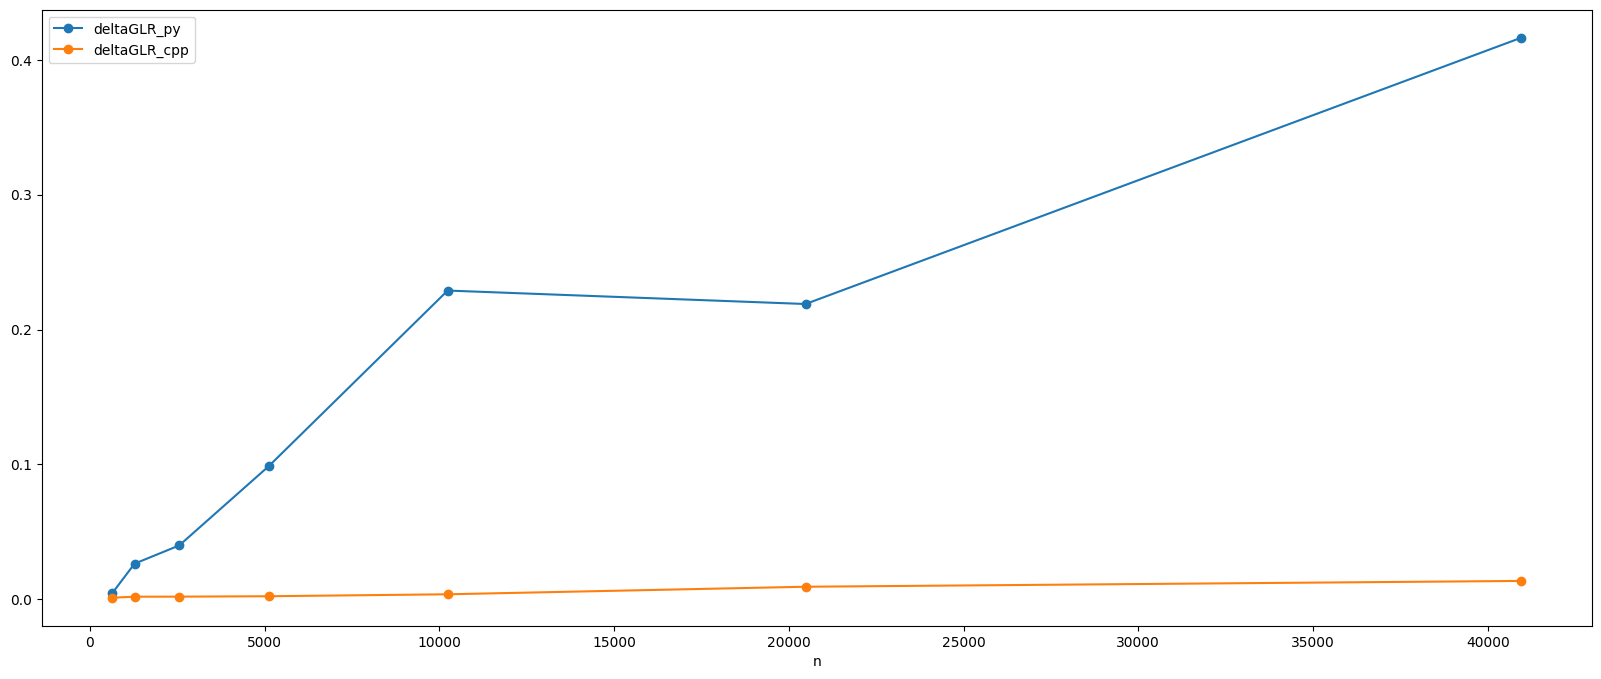

In [279]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP6)

##### Filter results

In [280]:
dexpcommunityundirected = all_data[ all_data["Flag"] == "2expcommunityundirected"]
dexpcommunityundirected = dexpcommunityundirected[dexpcommunityundirected["Code"] == programming_language]

##### Set number of community as ID

In [281]:
def get_number_community(partition_name):
    partition_name = partition_name.split("/")[-1]
    partition_id = partition_name[len("partition"):]
    return int(partition_id)

dexpcommunityundirected["#community"] = dexpcommunityundirected['Partition'].apply(get_number_community)
dexpcommunityundirected.set_index("#community", inplace=True)
dexpcommunityundirected.sort_index(inplace=True)

##### Show total time

In [282]:
dexpcommunityundirected[["Total"]]

,Total
#community,
2,4.121456
4,2.957455
8,0.957249
16,0.504265
32,0.753997
64,0.901580
128,1.594521


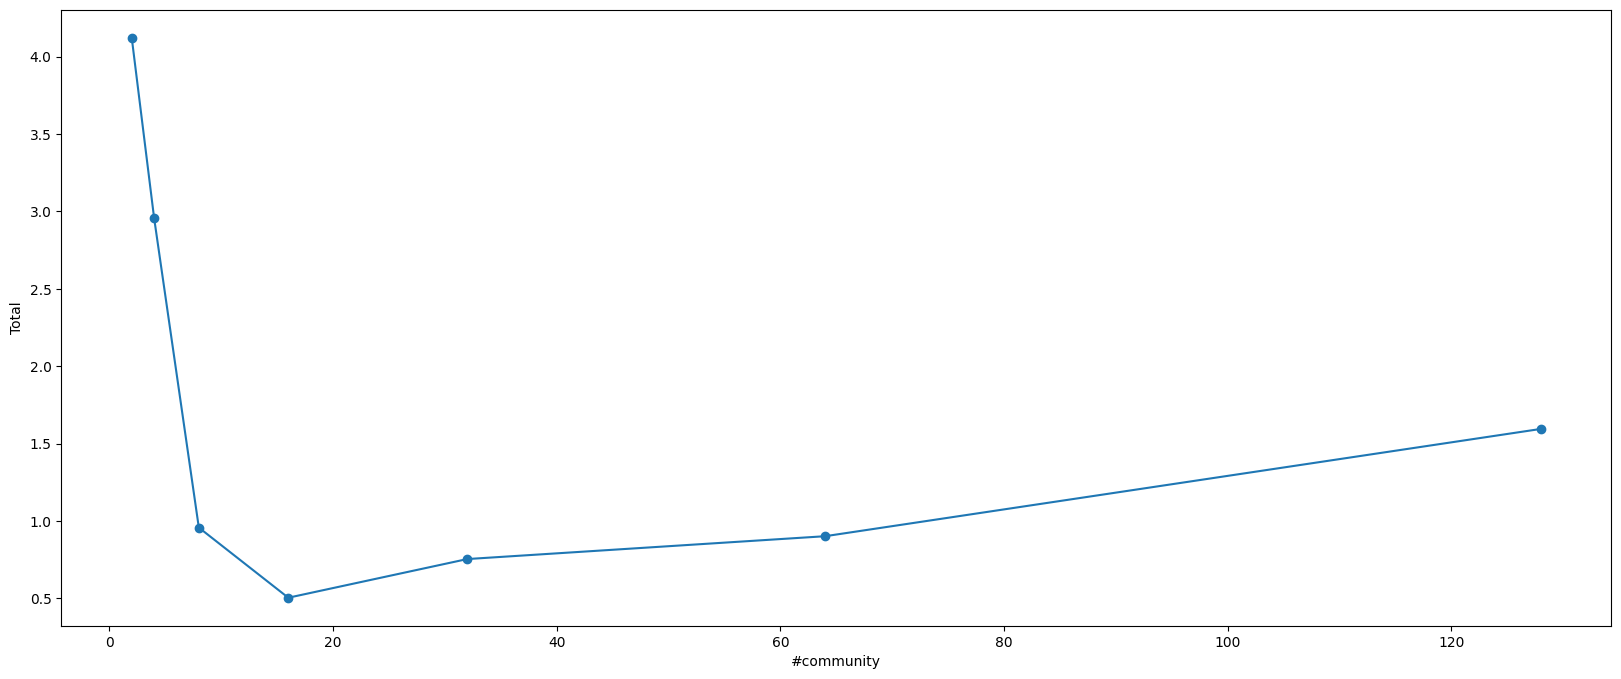

In [283]:
plot_column(dexpcommunityundirected, ["Total"])

##### Show nodesComputation

In [284]:
dexpcommunityundirected[["deltaNodesComputation"]]

,deltaNodesComputation
#community,
2,4.105119
4,2.933335
8,0.900996
16,0.449343
32,0.655654
64,0.779256
128,1.349908


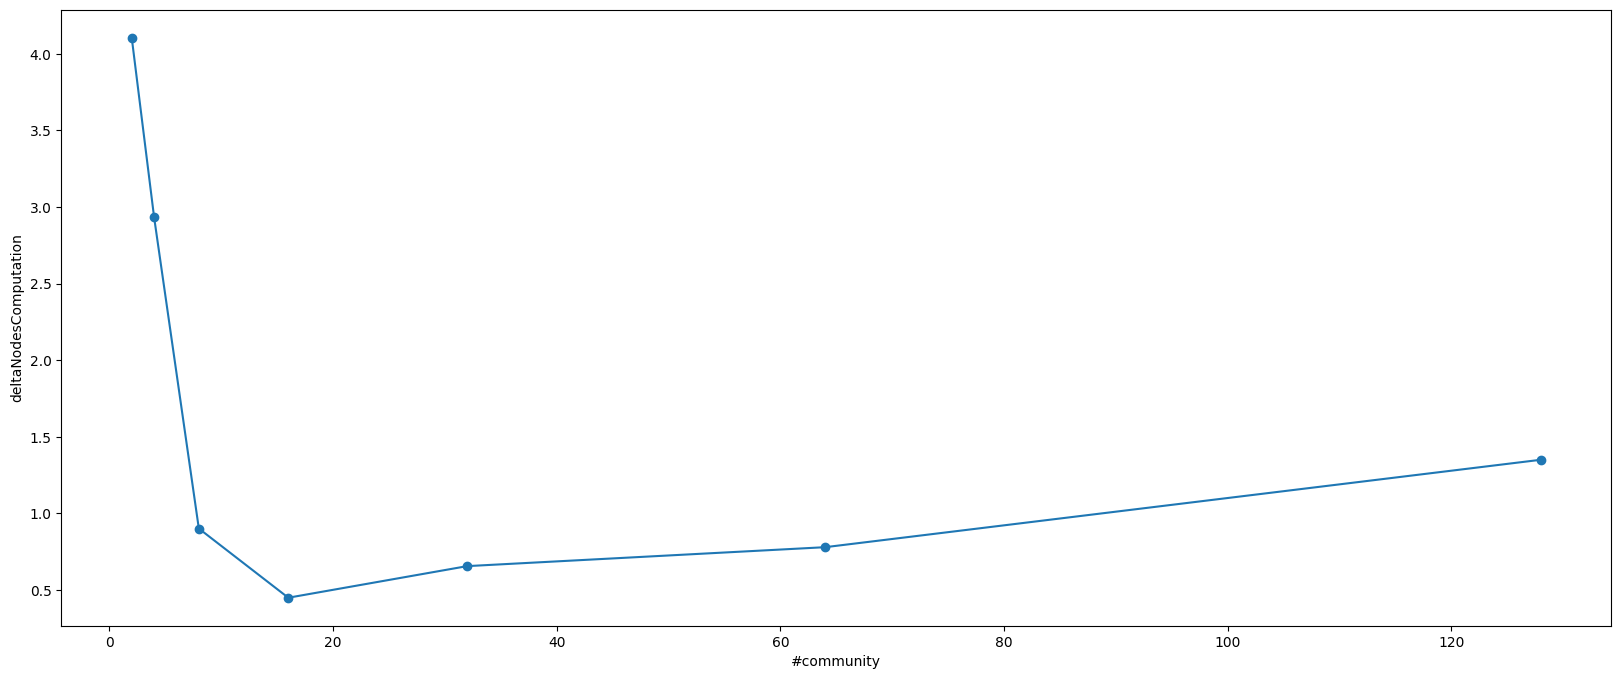

In [285]:
plot_column(dexpcommunityundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [286]:
dexpcommunityundirected[["deltaGLR"]]

,deltaGLR
#community,
2,0.002500
4,0.004481
8,0.011256
16,0.014057
32,0.025610
64,0.051945
128,0.106707


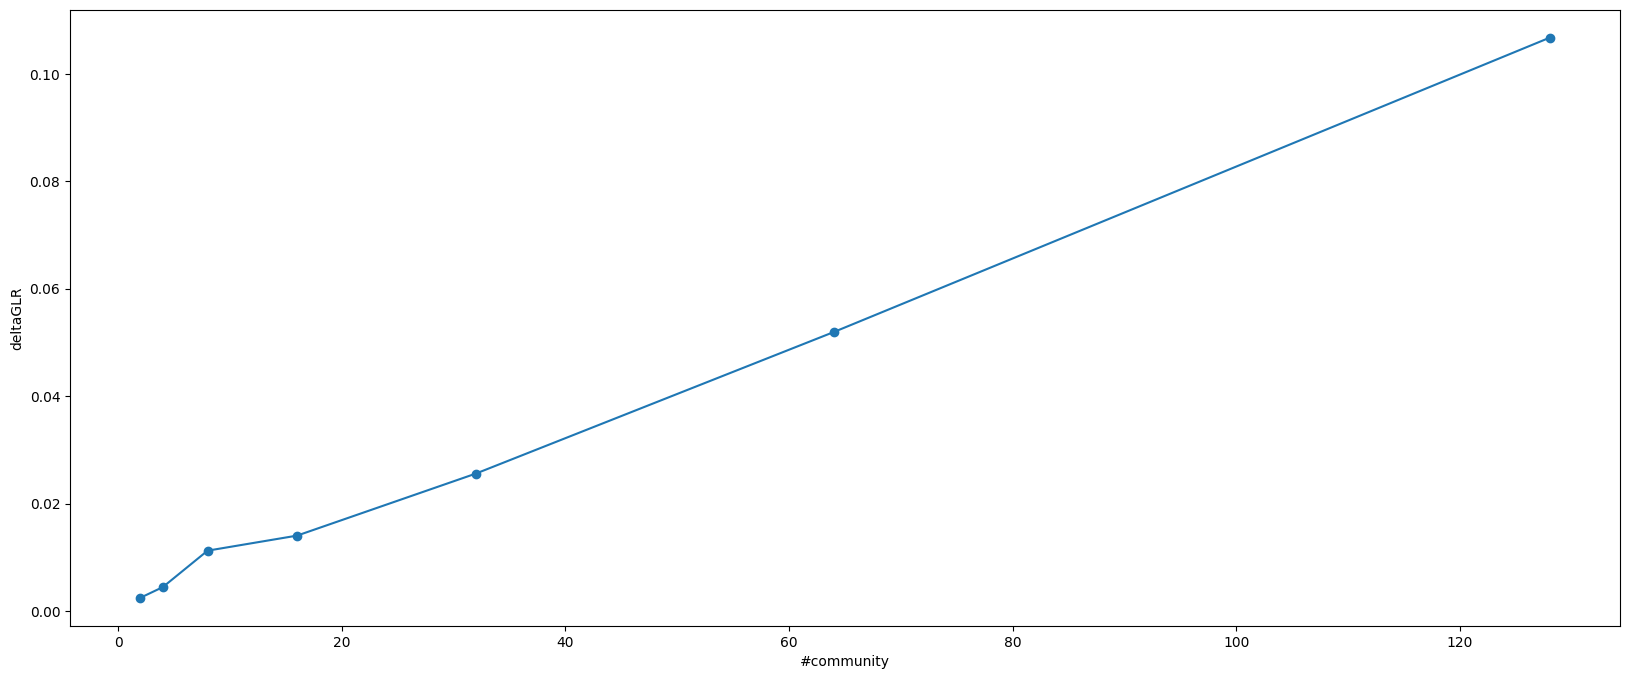

In [287]:
plot_column(dexpcommunityundirected, ["deltaGLR"])

# Double Experiment (EXP7)

##### Filter results

In [288]:
dexpedgeundirected = all_data[ all_data["Flag"] == "2expedgeundirected"]
dexpedgeundirected = dexpedgeundirected[dexpedgeundirected["Code"] == programming_language]

##### Set number of edges as ID

In [289]:
dexpedgeundirected.set_index("m", inplace=True)
dexpedgeundirected.sort_index(inplace=True)

##### Show total time

In [290]:
dexpedgeundirected[["Total"]]

,Total
m,
639,0.012401
1278,0.014522
2556,0.012195
5112,0.014497
10224,0.019403
20448,0.021576
40896,0.026917
81792,0.040199
163584,0.039280


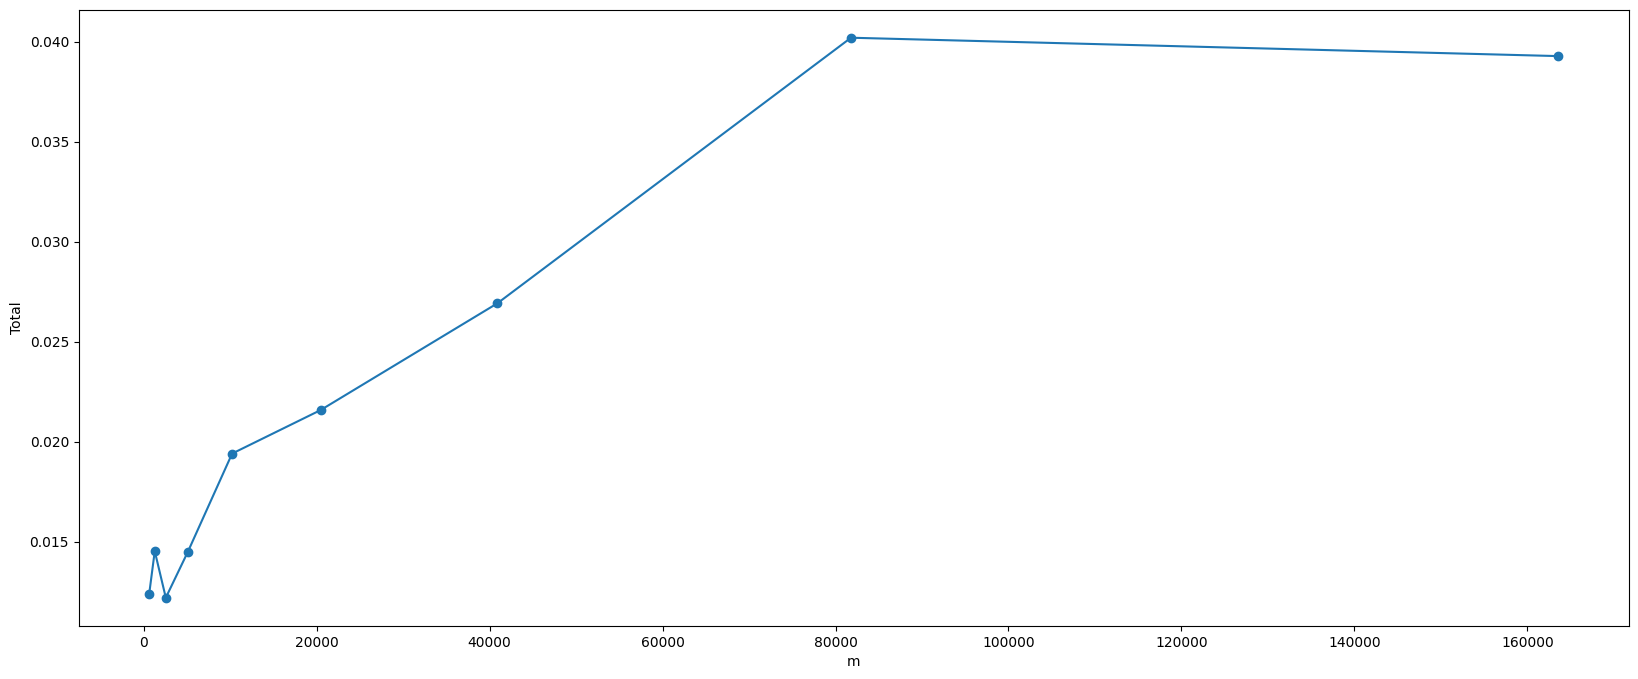

In [291]:
plot_column(dexpedgeundirected, ["Total"])

##### Show partitionsComputation

In [292]:
dexpedgeundirected[["Community computation"]]

,Community computation
m,
639,0.007181
1278,0.008454
2556,0.008965
5112,0.010110
10224,0.008763
20448,0.012971
40896,0.012730
81792,0.019850
163584,0.020102


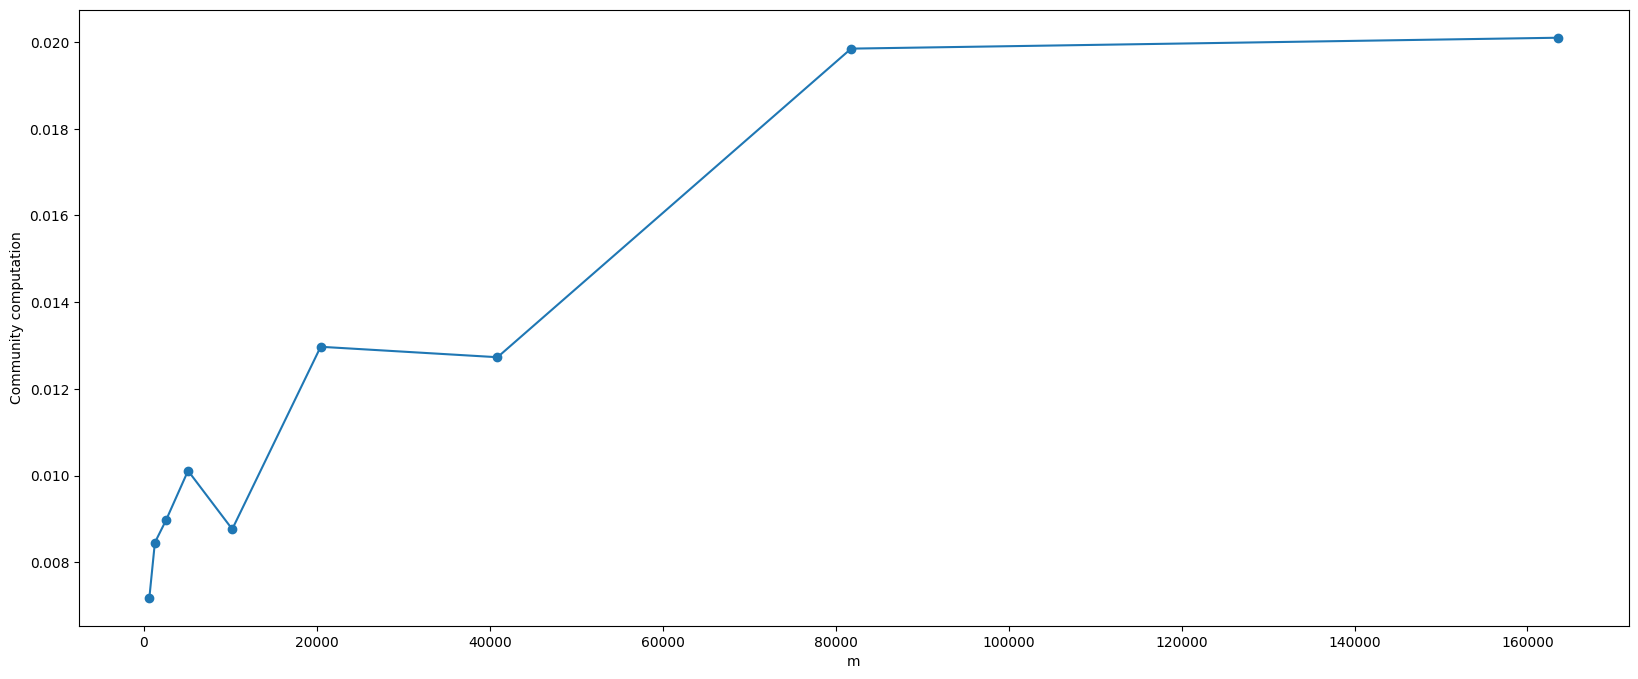

In [293]:
plot_column(dexpedgeundirected, ["Community computation"])

##### Show nodesComputation

In [294]:
dexpedgeundirected[["deltaNodesComputation"]]

,deltaNodesComputation
m,
639,0.004873
1278,0.005789
2556,0.002945
5112,0.004193
10224,0.010301
20448,0.008300
40896,0.013642
81792,0.019173
163584,0.017765


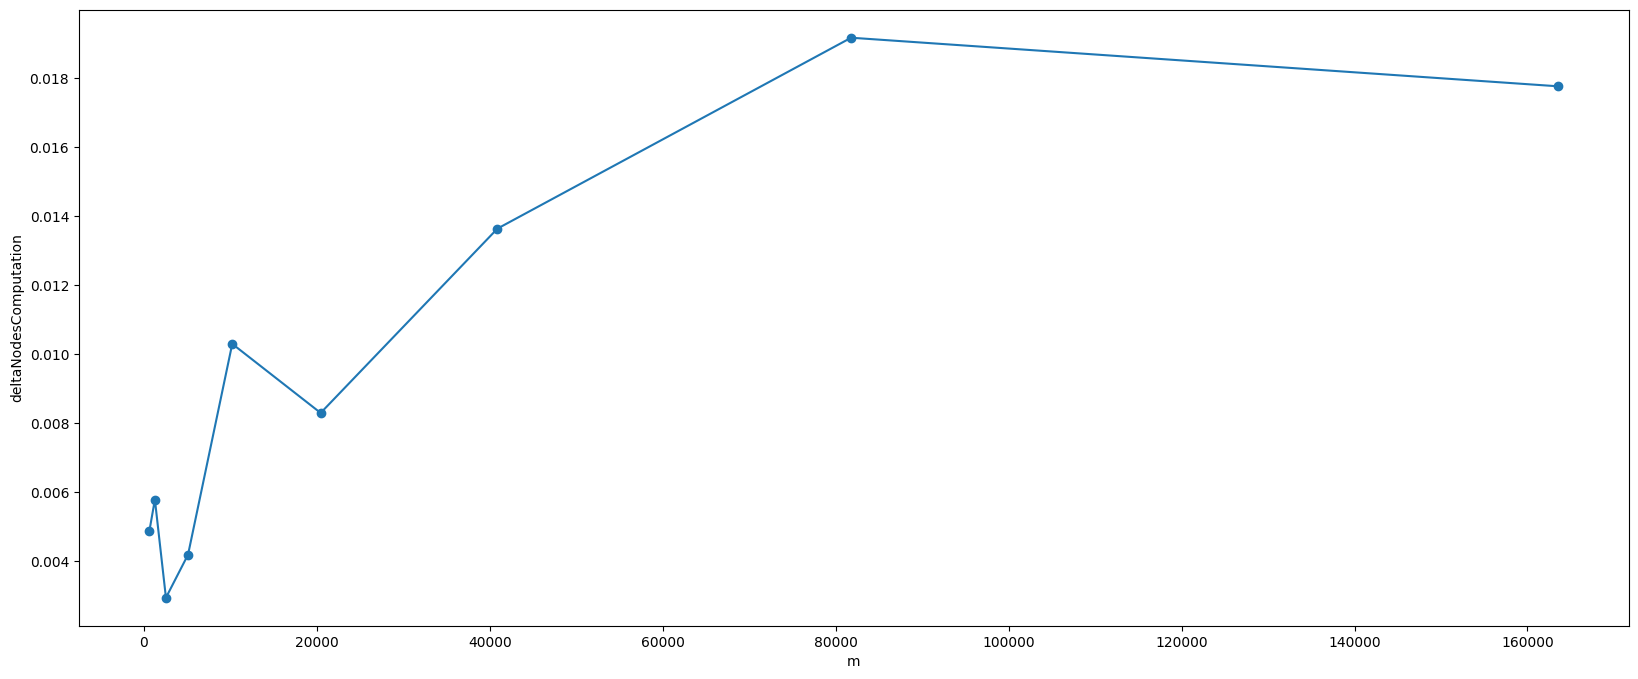

In [295]:
plot_column(dexpedgeundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [296]:
dexpedgeundirected[["deltaGLR"]]

,deltaGLR
m,
639,0.000323
1278,0.000258
2556,0.000266
5112,0.000179
10224,0.000322
20448,0.000292
40896,0.000529
81792,0.001159
163584,0.001400


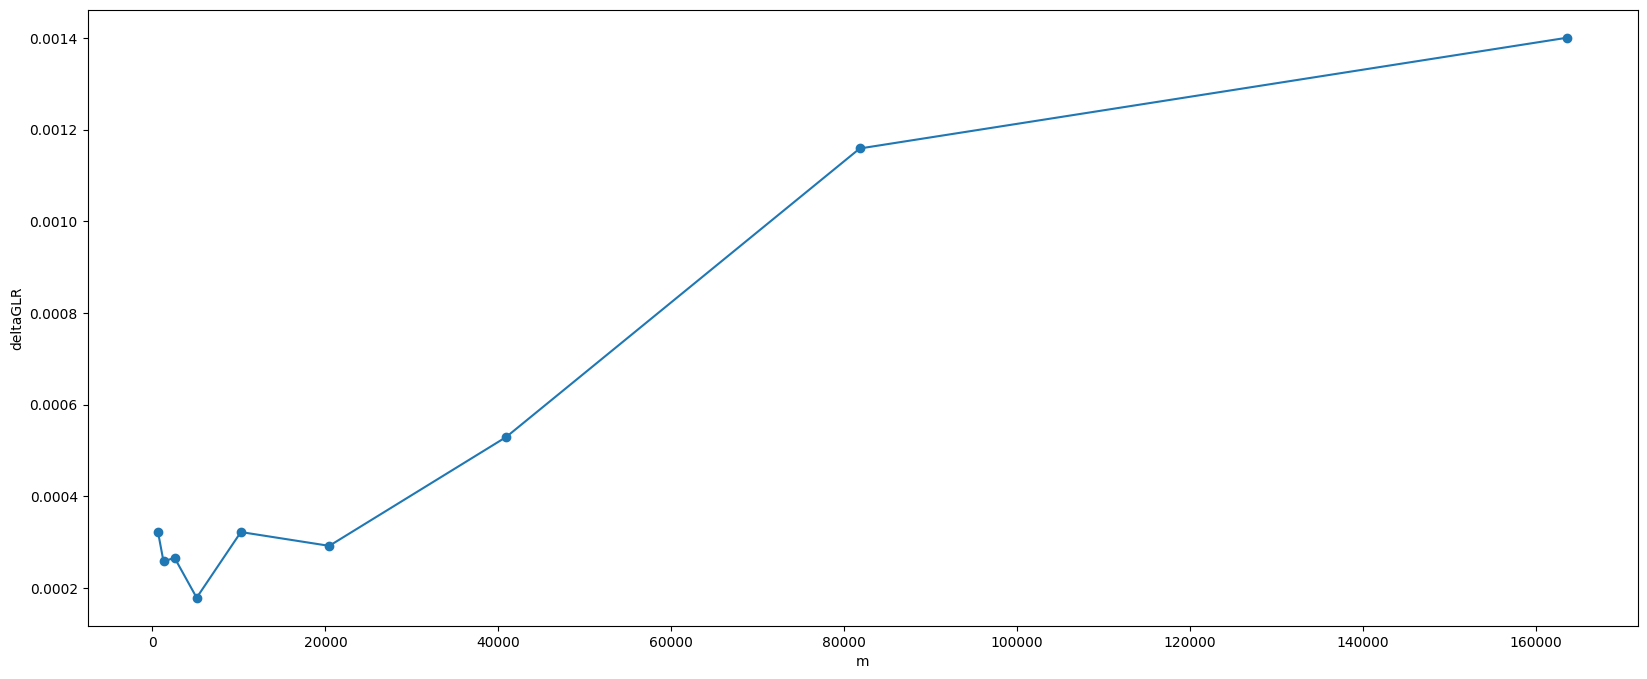

In [297]:
plot_column(dexpedgeundirected, ["deltaGLR"])